In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf

#### Reading file for training and testing

In [2]:
dataset = pd.read_csv('training-ds.csv', encoding='utf-8')
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


    We will view the first 10 lines of the dataset to understand the data we will work with:

In [3]:
dataset[:10]

,Tipo de Red,Estudiante de Tecnología,Nivel de Educación,Vive en Ciudad,Tipo de Instituto,Edad,Dispositivo,Tipo de Internet,Situación Financiera,Género,Duración de la Clase,Nivel de Adaptación
0,3G,Si,Universidad,Si,Privado,21-25,Computadora,Wifi,Media,Masculino,03-Jun,Bajo
1,3G,No,Escuela,Si,Privado,Nov-15,Smartphone,Compra Megas,Media,Femenino,01-Mar,Moderado
2,3G,Si,Universidad,Si,Privado,21-25,Smartphone,Compra Megas,Mala,Masculino,01-Mar,Bajo
3,3G,Si,Escuela,Si,Privado,Nov-15,Smartphone,Compra Megas,Media,Masculino,01-Mar,Moderado
4,4G,Si,Universidad,Si,Privado,21-25,Computadora,Wifi,Buena,Masculino,01-Mar,Alto
5,3G,No,Escuela,No,Público,Nov-15,Smartphone,Compra Megas,Media,Masculino,0,Bajo
6,4G,Si,Escuela,Si,Privado,Nov-15,Smartphone,Compra Megas,Media,Masculino,01-Mar,Moderado
7,3G,No,Escuela,Si,Privado,Nov-15,Smartphone,Compra Megas,Media,Masculino,01-Mar,Moderado
8,4G,No,Universidad,Si,Privado,21-25,Smartphone,Compra Megas,Mala,Masculino,01-Mar,Alto
9,4G,No,Escuela,Si,Público,16-20,Smartphone,Wifi,Media,Masculino,01-Mar,Moderado


    We can observe that all of the variables are nominal(categorical), which means they are not numerical, and they represent categories that have no order. The target column(nivel de adaptabilidad) is also categorical.
    Now we will analyze the possible values(categories) for each column:

In [14]:
for col in dataset:
    print("----------------")
    print(col)
    print(dataset[col].unique())

----------------
Tipo de Red
['3G' '4G' '2G']
----------------
Estudiante de Tecnología
['Si' 'No']
----------------
Nivel de Educación
['Universidad' 'Escuela' 'Colegio']
----------------
Vive en Ciudad
['Si' 'No']
----------------
Tipo de Instituto
['Privado' 'Público']
----------------
Edad
['21-25' 'Nov-15' '16-20' '26-30' '01-May' '06-Oct']
----------------
Dispositivo
['Computadora' 'Smartphone' 'Tableta']
----------------
Tipo de Internet
['Wifi' 'Compra Megas']
----------------
Situación Financiera
['Media' 'Mala' 'Buena']
----------------
Género
['Masculino' 'Femenino']
----------------
Duración de la Clase
['03-Jun' '01-Mar' '0']
----------------
Nivel de Adaptación
['Bajo' 'Moderado' 'Alto']


 We can see that the values found in each column seem clean, except for the two columns (Edad and Duración de la Clase), that have strange categories that do not seem to match their meaning:

In [11]:
edad_column = dataset["Edad"]
print(edad_column.unique())

['21-25' 'Nov-15' '16-20' '26-30' '01-May' '06-Oct']


In [12]:
edad_column = dataset["Duración de la Clase"]
print(edad_column.unique())

['03-Jun' '01-Mar' '0']


    These columns have number ranges, but they also have dates, which is strange. This could be because of the type of data it  assigned to these columns in the csv. However, we are not going to do anything about this, because we think they represent other possible categories, and since we will perform one-hot encoding next, we really do not care about what the category is, what we care about is that it rerpesents a unique category. (So Nov-15 might represent the age range of 11-15, and naming it Nov-15 won't affect our results).
    
    
    Now we will see if the dataset has null values:

In [13]:
dataset.isnull().any()

Tipo de Red                 False
Estudiante de Tecnología    False
Nivel de Educación          False
Vive en Ciudad              False
Tipo de Instituto           False
Edad                        False
Dispositivo                 False
Tipo de Internet            False
Situación Financiera        False
Género                      False
Duración de la Clase        False
Nivel de Adaptación         False
dtype: bool

    As we can see above, there are no null values in the dataset. This means we can use the whole dataset 'as it is', without the need to replace or take out null values.
    
    Below, as the next step, we will transform the dataset into ONE-HOT ENCODING.
    One-hot encoding means dividing a categorical column with n categories into n columns of 0s and 1s, one for each category, with 0 meaning it does not belong to that category, and 1 meaning it does belong to that category:
        For example, the column "Vive en Ciudad", which has the categories "Si" and "No", would be divided into 2 columns, which would come out as: 
            1 Vive en Ciudad Si
            2 Vive en Ciudad No
            , and if a row had "Si" assigned to "Vive en Ciudad" column, it would be represented as:
            Vive en Ciudad Si | Vive en Ciudad No
                    1         |         0        
    This is necessary because a neural network works with numbers and not categories.
    Since all of the dataset columns are categorical, one hot encoding needs to be done to all of them:
        pd.get_dummies function does this:

In [83]:
dataset_one_hot_encoded = pd.get_dummies(dataset)  
dataset_one_hot_encoded

,Tipo de Red_2G,Tipo de Red_3G,Tipo de Red_4G,Estudiante de Tecnología_No,Estudiante de Tecnología_Si,Nivel de Educación_Colegio,Nivel de Educación_Escuela,Nivel de Educación_Universidad,Vive en Ciudad_No,Vive en Ciudad_Si,...,Situación Financiera_Mala,Situación Financiera_Media,Género_Femenino,Género_Masculino,Duración de la Clase_0,Duración de la Clase_01-Mar,Duración de la Clase_03-Jun,Nivel de Adaptación_Alto,Nivel de Adaptación_Bajo,Nivel de Adaptación_Moderado
0,0,1,0,0,1,0,0,1,0,1,...,0,1,0,1,0,0,1,0,1,0
1,0,1,0,1,0,0,1,0,0,1,...,0,1,1,0,0,1,0,0,0,1
2,0,1,0,0,1,0,0,1,0,1,...,1,0,0,1,0,1,0,0,1,0
3,0,1,0,0,1,0,1,0,0,1,...,0,1,0,1,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,0,1,0,1,0,0,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
960,0,1,0,1,0,0,1,0,0,1,...,0,1,1,0,0,1,0,0,0,1
961,0,0,1,1,0,0,0,1,0,1,...,0,1,0,1,1,0,0,0,1,0
962,0,1,0,1,0,0,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1


    Now that we have our one-hot-encoded dataset, we will divide the dataset into x and y:
    (Notice that both x and y are one-hot encoded)
    The first 31 columns represent x (features) and the 3 last represent y (target-Nivel de adaptacion).
    Knowing this, we will select the first 31 columns for x and the 3 last for y:

#### Divide datset into x and y:

In [84]:
X = dataset_one_hot_encoded.iloc[:,:31]
X

,Tipo de Red_2G,Tipo de Red_3G,Tipo de Red_4G,Estudiante de Tecnología_No,Estudiante de Tecnología_Si,Nivel de Educación_Colegio,Nivel de Educación_Escuela,Nivel de Educación_Universidad,Vive en Ciudad_No,Vive en Ciudad_Si,...,Tipo de Internet_Compra Megas,Tipo de Internet_Wifi,Situación Financiera_Buena,Situación Financiera_Mala,Situación Financiera_Media,Género_Femenino,Género_Masculino,Duración de la Clase_0,Duración de la Clase_01-Mar,Duración de la Clase_03-Jun
0,0,1,0,0,1,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
1,0,1,0,1,0,0,1,0,0,1,...,1,0,0,0,1,1,0,0,1,0
2,0,1,0,0,1,0,0,1,0,1,...,1,0,0,1,0,0,1,0,1,0
3,0,1,0,0,1,0,1,0,0,1,...,1,0,0,0,1,0,1,0,1,0
4,0,0,1,0,1,0,0,1,0,1,...,0,1,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,0,1,0,1,0,0,0,1,0,1,...,1,0,0,0,1,0,1,0,1,0
960,0,1,0,1,0,0,1,0,0,1,...,1,0,0,0,1,1,0,0,1,0
961,0,0,1,1,0,0,0,1,0,1,...,1,0,0,0,1,0,1,1,0,0
962,0,1,0,1,0,0,0,1,0,1,...,1,0,0,0,1,0,1,0,1,0


In [85]:
y = dataset_one_hot_encoded.iloc[:,31:]
y

,Nivel de Adaptación_Alto,Nivel de Adaptación_Bajo,Nivel de Adaptación_Moderado
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,1,0,0
...,...,...,...
959,0,0,1
960,0,0,1
961,0,1,0
962,0,0,1


    Now we will use train_test_split function provided by sklearn to divide the dataset into training and testing:
#### Divide dataset into training and testing
    We chose a test_size of 0.2, which means:
        - 80% of the data will be used for training 
        - 20% of the data will be used for testing
    This is the most common partition for medium-sized datasets.
    The parameter random_state is used for getting the same values each time the notebook is executed. 
        random_state sets a seed for the random generator so we have the same training and test samples every time.

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(771, 31) (771, 3)
(193, 31) (193, 3)


    Now we will define some functions in order to save important data for our models and compare them with graphs:
    Functions:
    - graph_loss_vs_epochs:
        This function makes a graph comparing loss vs epochs, in both training and testing datasets. This will help us see how the algorithm is working. It makes use of the history of a model (which contains all the values of loss and accuracy throghout training). loss represents training loss and val_loss represents test loss. A vertical line will be also drawn in the graph, to view the lowest test loss the model found.
    - save_history: 
        This function helps us save the history parameters of a model, in order to use them for later comparations.
    - load_history:
        This function helps us load the previously saved history to use the data it saves.

In [3]:
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
def graph_loss_vs_epochs(history, save_image_filename, title):
    training_loss = history.history['loss']
    test_loss = history.history['val_loss'] #[10 9 8 5 6 7] 3

    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1) #[1 2 3 4 5 6]

    # Visualize loss history
    plt.title(title)
    plt.plot(epoch_count, training_loss, 'r--')
    plt.plot(epoch_count, test_loss, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss') 
    plt.axvline(x = epoch_count[test_loss.index(min(test_loss))], color = 'c', linestyle="dotted")
    plt.savefig(save_image_filename)
    plt.show()
    
def save_history(filename, model):
    np.save(filename,model.history.history)
    
def load_history(filename):
    history=np.load(filename,allow_pickle='TRUE').item()
    return history

    Now we can train the network. For this part, first we will try a simple model with one layer, explaining the steps taken for this. This will be our first hypothesis. We defined 4 hypothesis, adding a hidden Dense layer in each (which means model 1 has 1 hidden layer, model 2 has 2 hidden layers, and so on) , and performed variations in parameters such as:
    - activation functions
    - output units for a layer
    - learning rate
    - optimizer
    in order to find our best model. 
    For this noteboook not to be so long, these variations are performed in different notebooks.
    Variations for models 1 and 3 are performed in TiaraModels folder
    Variations for models 2 and 4 are performed in CaroModels folder
    
#### Train the network:
    The first model we will train is a simple model with a hidden layer and an output Dense layer with 3 units, because we have 3 possible categories for the output (Nivel de adaptabilidad: bajo, moderado, alto). 
    As parameters for our first variation we use relu as activation function and 20 units for the hidden layer.

In [87]:
model = tf.keras.Sequential([
      tf.keras.layers.Dense(20, activation='relu'),
      tf.keras.layers.Dense(3)
    ])

    It is time to define our parameters and train our model:
    Notice that in our model architecture (shown in the previous cell), we have not defined an activation function for the output Dense layer. We could have defined softmax as activation function to get the probability of the output belonging to each of the 3 output categories. However, with the parameter from_logits = true in the loss_function (shown below), we tell the loss function that the input cross entropy layer is normal (not a probability), therefore the loss function applies softmax automatically.
    In other words, having from_logits = True and no activation function in the output layer is equivalent to having from_logits = False and activation softmax for output layer.
    
    We will start with a big learning rate of 0.01 (generally learning_rate ranges from 0.001 to 0.01), a batch size of 64, CategoricalCrossentropy function as loss function, and SGD as optimizer.
    - CategoricalCrossentropy: is a loss function used in multi-classification, in which the output target variable needs to be passed as one-hot encoding. It uses the formula:
<img src="images/categorical_cross_entropy.png" width=400 height=400 />

     to calculate the error, where y^ is the model's output predicted and y is the target output, and output size is the number of categories in the output. 
     
    - SGD (Stochastic Gradient Descent):
    
    
    reference (https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/categorical-crossentropy)
    
    We are using a Checkpoint, in order to save the best model automatically, according to the minimum test loss (val_loss).
    This works by saving the first epoch model, and overwriting the saved model every time val_loss decreases.

Epoch 1/2000

Epoch 1: val_loss improved from inf to 1.11055, saving model to models\model_1
INFO:tensorflow:Assets written to: models\model_1\assets
13/13 - 1s - loss: 1.2319 - accuracy: 0.3191 - val_loss: 1.1105 - val_accuracy: 0.3472 - 1s/epoch - 91ms/step
Epoch 2/2000

Epoch 2: val_loss improved from 1.11055 to 1.01155, saving model to models\model_1
INFO:tensorflow:Assets written to: models\model_1\assets
13/13 - 1s - loss: 1.0540 - accuracy: 0.4228 - val_loss: 1.0116 - val_accuracy: 0.5026 - 559ms/epoch - 43ms/step
Epoch 3/2000

Epoch 3: val_loss improved from 1.01155 to 0.97143, saving model to models\model_1
INFO:tensorflow:Assets written to: models\model_1\assets
13/13 - 1s - loss: 0.9820 - accuracy: 0.5214 - val_loss: 0.9714 - val_accuracy: 0.5389 - 653ms/epoch - 50ms/step
Epoch 4/2000

Epoch 4: val_loss improved from 0.97143 to 0.95103, saving model to models\model_1
INFO:tensorflow:Assets written to: models\model_1\assets
13/13 - 1s - loss: 0.9499 - accuracy: 0.5396 - val_l


Epoch 34: val_loss did not improve from 0.81278
13/13 - 0s - loss: 0.7905 - accuracy: 0.6602 - val_loss: 0.8145 - val_accuracy: 0.6477 - 75ms/epoch - 6ms/step
Epoch 35/2000

Epoch 35: val_loss improved from 0.81278 to 0.80767, saving model to models\model_1
INFO:tensorflow:Assets written to: models\model_1\assets
13/13 - 1s - loss: 0.7889 - accuracy: 0.6576 - val_loss: 0.8077 - val_accuracy: 0.6528 - 691ms/epoch - 53ms/step
Epoch 36/2000

Epoch 36: val_loss did not improve from 0.80767
13/13 - 0s - loss: 0.7871 - accuracy: 0.6602 - val_loss: 0.8104 - val_accuracy: 0.6477 - 55ms/epoch - 4ms/step
Epoch 37/2000

Epoch 37: val_loss did not improve from 0.80767
13/13 - 0s - loss: 0.7851 - accuracy: 0.6576 - val_loss: 0.8115 - val_accuracy: 0.6477 - 55ms/epoch - 4ms/step
Epoch 38/2000

Epoch 38: val_loss improved from 0.80767 to 0.79765, saving model to models\model_1
INFO:tensorflow:Assets written to: models\model_1\assets
13/13 - 1s - loss: 0.7841 - accuracy: 0.6511 - val_loss: 0.7977 - v

INFO:tensorflow:Assets written to: models\model_1\assets
13/13 - 1s - loss: 0.7381 - accuracy: 0.6757 - val_loss: 0.7498 - val_accuracy: 0.6736 - 700ms/epoch - 54ms/step
Epoch 71/2000

Epoch 71: val_loss improved from 0.74983 to 0.74859, saving model to models\model_1
INFO:tensorflow:Assets written to: models\model_1\assets
13/13 - 1s - loss: 0.7365 - accuracy: 0.6706 - val_loss: 0.7486 - val_accuracy: 0.6736 - 666ms/epoch - 51ms/step
Epoch 72/2000

Epoch 72: val_loss improved from 0.74859 to 0.74318, saving model to models\model_1
INFO:tensorflow:Assets written to: models\model_1\assets
13/13 - 1s - loss: 0.7348 - accuracy: 0.6732 - val_loss: 0.7432 - val_accuracy: 0.6580 - 552ms/epoch - 42ms/step
Epoch 73/2000

Epoch 73: val_loss did not improve from 0.74318
13/13 - 0s - loss: 0.7339 - accuracy: 0.6680 - val_loss: 0.7487 - val_accuracy: 0.6736 - 71ms/epoch - 5ms/step
Epoch 74/2000

Epoch 74: val_loss improved from 0.74318 to 0.74132, saving model to models\model_1
INFO:tensorflow:Ass

13/13 - 1s - loss: 0.7031 - accuracy: 0.6939 - val_loss: 0.7072 - val_accuracy: 0.6580 - 576ms/epoch - 44ms/step
Epoch 108/2000

Epoch 108: val_loss improved from 0.70720 to 0.70619, saving model to models\model_1
INFO:tensorflow:Assets written to: models\model_1\assets
13/13 - 1s - loss: 0.7037 - accuracy: 0.6744 - val_loss: 0.7062 - val_accuracy: 0.6580 - 536ms/epoch - 41ms/step
Epoch 109/2000

Epoch 109: val_loss improved from 0.70619 to 0.70477, saving model to models\model_1
INFO:tensorflow:Assets written to: models\model_1\assets
13/13 - 1s - loss: 0.7035 - accuracy: 0.6719 - val_loss: 0.7048 - val_accuracy: 0.6528 - 778ms/epoch - 60ms/step
Epoch 110/2000

Epoch 110: val_loss did not improve from 0.70477
13/13 - 0s - loss: 0.7024 - accuracy: 0.6693 - val_loss: 0.7067 - val_accuracy: 0.6788 - 74ms/epoch - 6ms/step
Epoch 111/2000

Epoch 111: val_loss did not improve from 0.70477
13/13 - 0s - loss: 0.7001 - accuracy: 0.7017 - val_loss: 0.7072 - val_accuracy: 0.6788 - 59ms/epoch - 5m

13/13 - 0s - loss: 0.6808 - accuracy: 0.7121 - val_loss: 0.6885 - val_accuracy: 0.6839 - 55ms/epoch - 4ms/step
Epoch 146/2000

Epoch 146: val_loss did not improve from 0.68569
13/13 - 0s - loss: 0.6790 - accuracy: 0.7082 - val_loss: 0.6885 - val_accuracy: 0.6891 - 71ms/epoch - 5ms/step
Epoch 147/2000

Epoch 147: val_loss improved from 0.68569 to 0.68353, saving model to models\model_1
INFO:tensorflow:Assets written to: models\model_1\assets
13/13 - 1s - loss: 0.6788 - accuracy: 0.7082 - val_loss: 0.6835 - val_accuracy: 0.6684 - 588ms/epoch - 45ms/step
Epoch 148/2000

Epoch 148: val_loss improved from 0.68353 to 0.68184, saving model to models\model_1
INFO:tensorflow:Assets written to: models\model_1\assets
13/13 - 1s - loss: 0.6782 - accuracy: 0.7095 - val_loss: 0.6818 - val_accuracy: 0.6684 - 702ms/epoch - 54ms/step
Epoch 149/2000

Epoch 149: val_loss improved from 0.68184 to 0.68033, saving model to models\model_1
INFO:tensorflow:Assets written to: models\model_1\assets
13/13 - 1s - 

Epoch 187/2000

Epoch 187: val_loss did not improve from 0.66920
13/13 - 0s - loss: 0.6605 - accuracy: 0.7263 - val_loss: 0.6744 - val_accuracy: 0.7098 - 39ms/epoch - 3ms/step
Epoch 188/2000

Epoch 188: val_loss did not improve from 0.66920
13/13 - 0s - loss: 0.6598 - accuracy: 0.7276 - val_loss: 0.6766 - val_accuracy: 0.7098 - 52ms/epoch - 4ms/step
Epoch 189/2000

Epoch 189: val_loss did not improve from 0.66920
13/13 - 0s - loss: 0.6603 - accuracy: 0.7250 - val_loss: 0.6730 - val_accuracy: 0.7098 - 45ms/epoch - 3ms/step
Epoch 190/2000

Epoch 190: val_loss did not improve from 0.66920
13/13 - 0s - loss: 0.6597 - accuracy: 0.7302 - val_loss: 0.6695 - val_accuracy: 0.6995 - 50ms/epoch - 4ms/step
Epoch 191/2000

Epoch 191: val_loss did not improve from 0.66920
13/13 - 0s - loss: 0.6588 - accuracy: 0.7289 - val_loss: 0.6714 - val_accuracy: 0.7098 - 41ms/epoch - 3ms/step
Epoch 192/2000

Epoch 192: val_loss did not improve from 0.66920
13/13 - 0s - loss: 0.6585 - accuracy: 0.7302 - val_loss

13/13 - 0s - loss: 0.6453 - accuracy: 0.7432 - val_loss: 0.6684 - val_accuracy: 0.7202 - 39ms/epoch - 3ms/step
Epoch 230/2000

Epoch 230: val_loss did not improve from 0.65869
13/13 - 0s - loss: 0.6453 - accuracy: 0.7458 - val_loss: 0.6688 - val_accuracy: 0.7202 - 62ms/epoch - 5ms/step
Epoch 231/2000

Epoch 231: val_loss did not improve from 0.65869
13/13 - 0s - loss: 0.6451 - accuracy: 0.7419 - val_loss: 0.6662 - val_accuracy: 0.7202 - 57ms/epoch - 4ms/step
Epoch 232/2000

Epoch 232: val_loss did not improve from 0.65869
13/13 - 0s - loss: 0.6448 - accuracy: 0.7432 - val_loss: 0.6657 - val_accuracy: 0.7202 - 39ms/epoch - 3ms/step
Epoch 233/2000

Epoch 233: val_loss did not improve from 0.65869
13/13 - 0s - loss: 0.6436 - accuracy: 0.7458 - val_loss: 0.6629 - val_accuracy: 0.7202 - 58ms/epoch - 4ms/step
Epoch 234/2000

Epoch 234: val_loss did not improve from 0.65869
13/13 - 0s - loss: 0.6434 - accuracy: 0.7406 - val_loss: 0.6613 - val_accuracy: 0.7306 - 69ms/epoch - 5ms/step
Epoch 235

13/13 - 0s - loss: 0.6309 - accuracy: 0.7276 - val_loss: 0.6478 - val_accuracy: 0.7150 - 489ms/epoch - 38ms/step
Epoch 272/2000

Epoch 272: val_loss did not improve from 0.64778
13/13 - 0s - loss: 0.6309 - accuracy: 0.7367 - val_loss: 0.6528 - val_accuracy: 0.7358 - 49ms/epoch - 4ms/step
Epoch 273/2000

Epoch 273: val_loss did not improve from 0.64778
13/13 - 0s - loss: 0.6300 - accuracy: 0.7380 - val_loss: 0.6479 - val_accuracy: 0.7150 - 43ms/epoch - 3ms/step
Epoch 274/2000

Epoch 274: val_loss did not improve from 0.64778
13/13 - 0s - loss: 0.6288 - accuracy: 0.7367 - val_loss: 0.6515 - val_accuracy: 0.7358 - 51ms/epoch - 4ms/step
Epoch 275/2000

Epoch 275: val_loss did not improve from 0.64778
13/13 - 0s - loss: 0.6297 - accuracy: 0.7458 - val_loss: 0.6554 - val_accuracy: 0.7358 - 56ms/epoch - 4ms/step
Epoch 276/2000

Epoch 276: val_loss did not improve from 0.64778
13/13 - 0s - loss: 0.6299 - accuracy: 0.7471 - val_loss: 0.6575 - val_accuracy: 0.7358 - 53ms/epoch - 4ms/step
Epoch 2

13/13 - 1s - loss: 0.6166 - accuracy: 0.7367 - val_loss: 0.6393 - val_accuracy: 0.7306 - 578ms/epoch - 44ms/step
Epoch 314/2000

Epoch 314: val_loss did not improve from 0.63932
13/13 - 0s - loss: 0.6183 - accuracy: 0.7341 - val_loss: 0.6429 - val_accuracy: 0.7306 - 48ms/epoch - 4ms/step
Epoch 315/2000

Epoch 315: val_loss improved from 0.63932 to 0.63896, saving model to models\model_1
INFO:tensorflow:Assets written to: models\model_1\assets
13/13 - 1s - loss: 0.6161 - accuracy: 0.7471 - val_loss: 0.6390 - val_accuracy: 0.7306 - 521ms/epoch - 40ms/step
Epoch 316/2000

Epoch 316: val_loss did not improve from 0.63896
13/13 - 0s - loss: 0.6159 - accuracy: 0.7328 - val_loss: 0.6422 - val_accuracy: 0.7306 - 42ms/epoch - 3ms/step
Epoch 317/2000

Epoch 317: val_loss improved from 0.63896 to 0.63857, saving model to models\model_1
INFO:tensorflow:Assets written to: models\model_1\assets
13/13 - 1s - loss: 0.6159 - accuracy: 0.7458 - val_loss: 0.6386 - val_accuracy: 0.7306 - 534ms/epoch - 41m

Epoch 357/2000

Epoch 357: val_loss did not improve from 0.62831
13/13 - 0s - loss: 0.6037 - accuracy: 0.7510 - val_loss: 0.6328 - val_accuracy: 0.7565 - 59ms/epoch - 5ms/step
Epoch 358/2000

Epoch 358: val_loss did not improve from 0.62831
13/13 - 0s - loss: 0.6033 - accuracy: 0.7549 - val_loss: 0.6283 - val_accuracy: 0.7306 - 62ms/epoch - 5ms/step
Epoch 359/2000

Epoch 359: val_loss did not improve from 0.62831
13/13 - 0s - loss: 0.6044 - accuracy: 0.7380 - val_loss: 0.6396 - val_accuracy: 0.7565 - 61ms/epoch - 5ms/step
Epoch 360/2000

Epoch 360: val_loss did not improve from 0.62831
13/13 - 0s - loss: 0.6039 - accuracy: 0.7652 - val_loss: 0.6287 - val_accuracy: 0.7461 - 69ms/epoch - 5ms/step
Epoch 361/2000

Epoch 361: val_loss improved from 0.62831 to 0.62699, saving model to models\model_1
INFO:tensorflow:Assets written to: models\model_1\assets
13/13 - 1s - loss: 0.6024 - accuracy: 0.7393 - val_loss: 0.6270 - val_accuracy: 0.7358 - 537ms/epoch - 41ms/step
Epoch 362/2000

Epoch 362

Epoch 398/2000

Epoch 398: val_loss did not improve from 0.61998
13/13 - 0s - loss: 0.5909 - accuracy: 0.7730 - val_loss: 0.6210 - val_accuracy: 0.7461 - 52ms/epoch - 4ms/step
Epoch 399/2000

Epoch 399: val_loss improved from 0.61998 to 0.61900, saving model to models\model_1
INFO:tensorflow:Assets written to: models\model_1\assets
13/13 - 1s - loss: 0.5910 - accuracy: 0.7523 - val_loss: 0.6190 - val_accuracy: 0.7461 - 517ms/epoch - 40ms/step
Epoch 400/2000

Epoch 400: val_loss did not improve from 0.61900
13/13 - 0s - loss: 0.5909 - accuracy: 0.7523 - val_loss: 0.6222 - val_accuracy: 0.7409 - 49ms/epoch - 4ms/step
Epoch 401/2000

Epoch 401: val_loss did not improve from 0.61900
13/13 - 0s - loss: 0.5914 - accuracy: 0.7289 - val_loss: 0.6272 - val_accuracy: 0.7565 - 44ms/epoch - 3ms/step
Epoch 402/2000

Epoch 402: val_loss did not improve from 0.61900
13/13 - 0s - loss: 0.5893 - accuracy: 0.7691 - val_loss: 0.6232 - val_accuracy: 0.7202 - 58ms/epoch - 4ms/step
Epoch 403/2000

Epoch 403

Epoch 443/2000

Epoch 443: val_loss did not improve from 0.61651
13/13 - 0s - loss: 0.5769 - accuracy: 0.7626 - val_loss: 0.6269 - val_accuracy: 0.7668 - 52ms/epoch - 4ms/step
Epoch 444/2000

Epoch 444: val_loss did not improve from 0.61651
13/13 - 0s - loss: 0.5775 - accuracy: 0.7795 - val_loss: 0.6185 - val_accuracy: 0.7565 - 58ms/epoch - 4ms/step
Epoch 445/2000

Epoch 445: val_loss did not improve from 0.61651
13/13 - 0s - loss: 0.5763 - accuracy: 0.7601 - val_loss: 0.6180 - val_accuracy: 0.7565 - 62ms/epoch - 5ms/step
Epoch 446/2000

Epoch 446: val_loss did not improve from 0.61651
13/13 - 0s - loss: 0.5760 - accuracy: 0.7497 - val_loss: 0.6276 - val_accuracy: 0.7668 - 51ms/epoch - 4ms/step
Epoch 447/2000

Epoch 447: val_loss did not improve from 0.61651
13/13 - 0s - loss: 0.5770 - accuracy: 0.7795 - val_loss: 0.6195 - val_accuracy: 0.7306 - 43ms/epoch - 3ms/step
Epoch 448/2000

Epoch 448: val_loss did not improve from 0.61651
13/13 - 0s - loss: 0.5764 - accuracy: 0.7497 - val_loss


Epoch 489: val_loss did not improve from 0.61603
13/13 - 0s - loss: 0.5648 - accuracy: 0.7912 - val_loss: 0.6169 - val_accuracy: 0.7565 - 76ms/epoch - 6ms/step
Epoch 490/2000

Epoch 490: val_loss improved from 0.61603 to 0.61577, saving model to models\model_1
INFO:tensorflow:Assets written to: models\model_1\assets
13/13 - 1s - loss: 0.5624 - accuracy: 0.7730 - val_loss: 0.6158 - val_accuracy: 0.7358 - 532ms/epoch - 41ms/step
Epoch 491/2000

Epoch 491: val_loss did not improve from 0.61577
13/13 - 0s - loss: 0.5627 - accuracy: 0.7588 - val_loss: 0.6185 - val_accuracy: 0.7617 - 46ms/epoch - 4ms/step
Epoch 492/2000

Epoch 492: val_loss improved from 0.61577 to 0.61473, saving model to models\model_1
INFO:tensorflow:Assets written to: models\model_1\assets
13/13 - 1s - loss: 0.5614 - accuracy: 0.7860 - val_loss: 0.6147 - val_accuracy: 0.7565 - 597ms/epoch - 46ms/step
Epoch 493/2000

Epoch 493: val_loss did not improve from 0.61473
13/13 - 0s - loss: 0.5612 - accuracy: 0.7782 - val_loss:

13/13 - 1s - loss: 0.5520 - accuracy: 0.7899 - val_loss: 0.6105 - val_accuracy: 0.7720 - 567ms/epoch - 44ms/step
Epoch 532/2000

Epoch 532: val_loss did not improve from 0.61054
13/13 - 0s - loss: 0.5513 - accuracy: 0.7769 - val_loss: 0.6294 - val_accuracy: 0.7668 - 59ms/epoch - 5ms/step
Epoch 533/2000

Epoch 533: val_loss did not improve from 0.61054
13/13 - 0s - loss: 0.5548 - accuracy: 0.7899 - val_loss: 0.6139 - val_accuracy: 0.7617 - 53ms/epoch - 4ms/step
Epoch 534/2000

Epoch 534: val_loss did not improve from 0.61054
13/13 - 0s - loss: 0.5510 - accuracy: 0.7834 - val_loss: 0.6130 - val_accuracy: 0.7617 - 102ms/epoch - 8ms/step
Epoch 535/2000

Epoch 535: val_loss did not improve from 0.61054
13/13 - 0s - loss: 0.5504 - accuracy: 0.7899 - val_loss: 0.6157 - val_accuracy: 0.7617 - 52ms/epoch - 4ms/step
Epoch 536/2000

Epoch 536: val_loss did not improve from 0.61054
13/13 - 0s - loss: 0.5505 - accuracy: 0.7808 - val_loss: 0.6139 - val_accuracy: 0.7513 - 59ms/epoch - 5ms/step
Epoch 

Epoch 575/2000

Epoch 575: val_loss did not improve from 0.60339
13/13 - 0s - loss: 0.5384 - accuracy: 0.7964 - val_loss: 0.6045 - val_accuracy: 0.7720 - 62ms/epoch - 5ms/step
Epoch 576/2000

Epoch 576: val_loss did not improve from 0.60339
13/13 - 0s - loss: 0.5384 - accuracy: 0.7938 - val_loss: 0.6120 - val_accuracy: 0.7668 - 55ms/epoch - 4ms/step
Epoch 577/2000

Epoch 577: val_loss improved from 0.60339 to 0.60200, saving model to models\model_1
INFO:tensorflow:Assets written to: models\model_1\assets
13/13 - 1s - loss: 0.5403 - accuracy: 0.7977 - val_loss: 0.6020 - val_accuracy: 0.7668 - 567ms/epoch - 44ms/step
Epoch 578/2000

Epoch 578: val_loss did not improve from 0.60200
13/13 - 0s - loss: 0.5388 - accuracy: 0.7834 - val_loss: 0.6096 - val_accuracy: 0.7668 - 51ms/epoch - 4ms/step
Epoch 579/2000

Epoch 579: val_loss did not improve from 0.60200
13/13 - 0s - loss: 0.5385 - accuracy: 0.7938 - val_loss: 0.6041 - val_accuracy: 0.7720 - 69ms/epoch - 5ms/step
Epoch 580/2000

Epoch 580

13/13 - 0s - loss: 0.5305 - accuracy: 0.7704 - val_loss: 0.6005 - val_accuracy: 0.7617 - 59ms/epoch - 5ms/step
Epoch 619/2000

Epoch 619: val_loss did not improve from 0.59780
13/13 - 0s - loss: 0.5279 - accuracy: 0.7847 - val_loss: 0.6007 - val_accuracy: 0.7461 - 54ms/epoch - 4ms/step
Epoch 620/2000

Epoch 620: val_loss did not improve from 0.59780
13/13 - 0s - loss: 0.5279 - accuracy: 0.7782 - val_loss: 0.6028 - val_accuracy: 0.7513 - 48ms/epoch - 4ms/step
Epoch 621/2000

Epoch 621: val_loss did not improve from 0.59780
13/13 - 0s - loss: 0.5288 - accuracy: 0.7769 - val_loss: 0.6017 - val_accuracy: 0.7668 - 61ms/epoch - 5ms/step
Epoch 622/2000

Epoch 622: val_loss did not improve from 0.59780
13/13 - 0s - loss: 0.5268 - accuracy: 0.8042 - val_loss: 0.6033 - val_accuracy: 0.7668 - 58ms/epoch - 4ms/step
Epoch 623/2000

Epoch 623: val_loss did not improve from 0.59780
13/13 - 0s - loss: 0.5277 - accuracy: 0.8054 - val_loss: 0.5991 - val_accuracy: 0.7617 - 44ms/epoch - 3ms/step
Epoch 624

Epoch 664/2000

Epoch 664: val_loss did not improve from 0.59747
13/13 - 0s - loss: 0.5186 - accuracy: 0.8054 - val_loss: 0.6002 - val_accuracy: 0.7720 - 69ms/epoch - 5ms/step
Epoch 665/2000

Epoch 665: val_loss did not improve from 0.59747
13/13 - 0s - loss: 0.5171 - accuracy: 0.8003 - val_loss: 0.5998 - val_accuracy: 0.7668 - 71ms/epoch - 5ms/step
Epoch 666/2000

Epoch 666: val_loss improved from 0.59747 to 0.59675, saving model to models\model_1
INFO:tensorflow:Assets written to: models\model_1\assets
13/13 - 1s - loss: 0.5172 - accuracy: 0.8106 - val_loss: 0.5968 - val_accuracy: 0.7617 - 685ms/epoch - 53ms/step
Epoch 667/2000

Epoch 667: val_loss did not improve from 0.59675
13/13 - 0s - loss: 0.5156 - accuracy: 0.8106 - val_loss: 0.6003 - val_accuracy: 0.7617 - 63ms/epoch - 5ms/step
Epoch 668/2000

Epoch 668: val_loss improved from 0.59675 to 0.59637, saving model to models\model_1
INFO:tensorflow:Assets written to: models\model_1\assets
13/13 - 1s - loss: 0.5169 - accuracy: 0.809

Epoch 708/2000

Epoch 708: val_loss did not improve from 0.59303
13/13 - 0s - loss: 0.5074 - accuracy: 0.8054 - val_loss: 0.5965 - val_accuracy: 0.7772 - 86ms/epoch - 7ms/step
Epoch 709/2000

Epoch 709: val_loss did not improve from 0.59303
13/13 - 0s - loss: 0.5073 - accuracy: 0.8042 - val_loss: 0.5973 - val_accuracy: 0.7772 - 60ms/epoch - 5ms/step
Epoch 710/2000

Epoch 710: val_loss did not improve from 0.59303
13/13 - 0s - loss: 0.5082 - accuracy: 0.8093 - val_loss: 0.5987 - val_accuracy: 0.7668 - 53ms/epoch - 4ms/step
Epoch 711/2000

Epoch 711: val_loss improved from 0.59303 to 0.59141, saving model to models\model_1
INFO:tensorflow:Assets written to: models\model_1\assets
13/13 - 1s - loss: 0.5078 - accuracy: 0.8054 - val_loss: 0.5914 - val_accuracy: 0.7772 - 562ms/epoch - 43ms/step
Epoch 712/2000

Epoch 712: val_loss improved from 0.59141 to 0.59109, saving model to models\model_1
INFO:tensorflow:Assets written to: models\model_1\assets
13/13 - 1s - loss: 0.5079 - accuracy: 0.808

Epoch 753/2000

Epoch 753: val_loss did not improve from 0.58937
13/13 - 0s - loss: 0.4982 - accuracy: 0.8067 - val_loss: 0.6005 - val_accuracy: 0.7772 - 70ms/epoch - 5ms/step
Epoch 754/2000

Epoch 754: val_loss did not improve from 0.58937
13/13 - 0s - loss: 0.4996 - accuracy: 0.8184 - val_loss: 0.5942 - val_accuracy: 0.7668 - 60ms/epoch - 5ms/step
Epoch 755/2000

Epoch 755: val_loss did not improve from 0.58937
13/13 - 0s - loss: 0.4980 - accuracy: 0.8106 - val_loss: 0.5932 - val_accuracy: 0.7720 - 53ms/epoch - 4ms/step
Epoch 756/2000

Epoch 756: val_loss did not improve from 0.58937
13/13 - 0s - loss: 0.4974 - accuracy: 0.8119 - val_loss: 0.5930 - val_accuracy: 0.7668 - 62ms/epoch - 5ms/step
Epoch 757/2000

Epoch 757: val_loss did not improve from 0.58937
13/13 - 0s - loss: 0.4980 - accuracy: 0.8067 - val_loss: 0.5958 - val_accuracy: 0.7668 - 39ms/epoch - 3ms/step
Epoch 758/2000

Epoch 758: val_loss did not improve from 0.58937
13/13 - 0s - loss: 0.4971 - accuracy: 0.8145 - val_loss

Epoch 799/2000

Epoch 799: val_loss did not improve from 0.58532
13/13 - 0s - loss: 0.4893 - accuracy: 0.8067 - val_loss: 0.5880 - val_accuracy: 0.7876 - 59ms/epoch - 5ms/step
Epoch 800/2000

Epoch 800: val_loss did not improve from 0.58532
13/13 - 0s - loss: 0.4887 - accuracy: 0.8132 - val_loss: 0.5858 - val_accuracy: 0.7824 - 81ms/epoch - 6ms/step
Epoch 801/2000

Epoch 801: val_loss did not improve from 0.58532
13/13 - 0s - loss: 0.4882 - accuracy: 0.8067 - val_loss: 0.5911 - val_accuracy: 0.7565 - 51ms/epoch - 4ms/step
Epoch 802/2000

Epoch 802: val_loss did not improve from 0.58532
13/13 - 0s - loss: 0.4884 - accuracy: 0.8054 - val_loss: 0.6101 - val_accuracy: 0.7668 - 88ms/epoch - 7ms/step
Epoch 803/2000

Epoch 803: val_loss did not improve from 0.58532
13/13 - 0s - loss: 0.4931 - accuracy: 0.8093 - val_loss: 0.6050 - val_accuracy: 0.7772 - 88ms/epoch - 7ms/step
Epoch 804/2000

Epoch 804: val_loss did not improve from 0.58532
13/13 - 0s - loss: 0.4922 - accuracy: 0.8119 - val_loss

13/13 - 0s - loss: 0.4809 - accuracy: 0.8093 - val_loss: 0.5843 - val_accuracy: 0.7668 - 63ms/epoch - 5ms/step
Epoch 843/2000

Epoch 843: val_loss did not improve from 0.57815
13/13 - 0s - loss: 0.4800 - accuracy: 0.8093 - val_loss: 0.5917 - val_accuracy: 0.7772 - 97ms/epoch - 7ms/step
Epoch 844/2000

Epoch 844: val_loss did not improve from 0.57815
13/13 - 0s - loss: 0.4812 - accuracy: 0.8132 - val_loss: 0.5892 - val_accuracy: 0.7824 - 46ms/epoch - 4ms/step
Epoch 845/2000

Epoch 845: val_loss did not improve from 0.57815
13/13 - 0s - loss: 0.4811 - accuracy: 0.8119 - val_loss: 0.5862 - val_accuracy: 0.7772 - 71ms/epoch - 5ms/step
Epoch 846/2000

Epoch 846: val_loss did not improve from 0.57815
13/13 - 0s - loss: 0.4800 - accuracy: 0.8067 - val_loss: 0.5830 - val_accuracy: 0.7617 - 41ms/epoch - 3ms/step
Epoch 847/2000

Epoch 847: val_loss did not improve from 0.57815
13/13 - 0s - loss: 0.4794 - accuracy: 0.8042 - val_loss: 0.5864 - val_accuracy: 0.7772 - 58ms/epoch - 4ms/step
Epoch 848

Epoch 888/2000

Epoch 888: val_loss did not improve from 0.57548
13/13 - 0s - loss: 0.4713 - accuracy: 0.8249 - val_loss: 0.5823 - val_accuracy: 0.7668 - 61ms/epoch - 5ms/step
Epoch 889/2000

Epoch 889: val_loss did not improve from 0.57548
13/13 - 0s - loss: 0.4727 - accuracy: 0.8132 - val_loss: 0.5907 - val_accuracy: 0.7772 - 48ms/epoch - 4ms/step
Epoch 890/2000

Epoch 890: val_loss did not improve from 0.57548
13/13 - 0s - loss: 0.4733 - accuracy: 0.8249 - val_loss: 0.5783 - val_accuracy: 0.7979 - 54ms/epoch - 4ms/step
Epoch 891/2000

Epoch 891: val_loss did not improve from 0.57548
13/13 - 0s - loss: 0.4709 - accuracy: 0.8301 - val_loss: 0.5971 - val_accuracy: 0.7720 - 74ms/epoch - 6ms/step
Epoch 892/2000

Epoch 892: val_loss did not improve from 0.57548
13/13 - 0s - loss: 0.4748 - accuracy: 0.8327 - val_loss: 0.5928 - val_accuracy: 0.7668 - 70ms/epoch - 5ms/step
Epoch 893/2000

Epoch 893: val_loss did not improve from 0.57548
13/13 - 0s - loss: 0.4749 - accuracy: 0.8184 - val_loss

Epoch 933/2000

Epoch 933: val_loss did not improve from 0.57155
13/13 - 0s - loss: 0.4638 - accuracy: 0.8262 - val_loss: 0.5760 - val_accuracy: 0.7876 - 38ms/epoch - 3ms/step
Epoch 934/2000

Epoch 934: val_loss did not improve from 0.57155
13/13 - 0s - loss: 0.4636 - accuracy: 0.8262 - val_loss: 0.5775 - val_accuracy: 0.7824 - 46ms/epoch - 4ms/step
Epoch 935/2000

Epoch 935: val_loss did not improve from 0.57155
13/13 - 0s - loss: 0.4642 - accuracy: 0.8223 - val_loss: 0.5770 - val_accuracy: 0.7927 - 61ms/epoch - 5ms/step
Epoch 936/2000

Epoch 936: val_loss did not improve from 0.57155
13/13 - 0s - loss: 0.4623 - accuracy: 0.8327 - val_loss: 0.5775 - val_accuracy: 0.7927 - 66ms/epoch - 5ms/step
Epoch 937/2000

Epoch 937: val_loss did not improve from 0.57155
13/13 - 0s - loss: 0.4631 - accuracy: 0.8340 - val_loss: 0.5783 - val_accuracy: 0.7565 - 60ms/epoch - 5ms/step
Epoch 938/2000

Epoch 938: val_loss did not improve from 0.57155
13/13 - 0s - loss: 0.4634 - accuracy: 0.8262 - val_loss

INFO:tensorflow:Assets written to: models\model_1\assets
13/13 - 1s - loss: 0.4559 - accuracy: 0.8340 - val_loss: 0.5664 - val_accuracy: 0.7927 - 827ms/epoch - 64ms/step
Epoch 977/2000

Epoch 977: val_loss improved from 0.56644 to 0.56627, saving model to models\model_1
INFO:tensorflow:Assets written to: models\model_1\assets
13/13 - 1s - loss: 0.4571 - accuracy: 0.8301 - val_loss: 0.5663 - val_accuracy: 0.7979 - 744ms/epoch - 57ms/step
Epoch 978/2000

Epoch 978: val_loss did not improve from 0.56627
13/13 - 0s - loss: 0.4578 - accuracy: 0.8314 - val_loss: 0.5688 - val_accuracy: 0.7824 - 57ms/epoch - 4ms/step
Epoch 979/2000

Epoch 979: val_loss improved from 0.56627 to 0.56402, saving model to models\model_1
INFO:tensorflow:Assets written to: models\model_1\assets
13/13 - 1s - loss: 0.4586 - accuracy: 0.8184 - val_loss: 0.5640 - val_accuracy: 0.8031 - 555ms/epoch - 43ms/step
Epoch 980/2000

Epoch 980: val_loss did not improve from 0.56402
13/13 - 0s - loss: 0.4556 - accuracy: 0.8340 - 

Epoch 1019/2000

Epoch 1019: val_loss did not improve from 0.56196
13/13 - 0s - loss: 0.4525 - accuracy: 0.8353 - val_loss: 0.5665 - val_accuracy: 0.7668 - 58ms/epoch - 4ms/step
Epoch 1020/2000

Epoch 1020: val_loss improved from 0.56196 to 0.55781, saving model to models\model_1
INFO:tensorflow:Assets written to: models\model_1\assets
13/13 - 1s - loss: 0.4500 - accuracy: 0.8301 - val_loss: 0.5578 - val_accuracy: 0.7979 - 543ms/epoch - 42ms/step
Epoch 1021/2000

Epoch 1021: val_loss did not improve from 0.55781
13/13 - 0s - loss: 0.4506 - accuracy: 0.8340 - val_loss: 0.5628 - val_accuracy: 0.7927 - 59ms/epoch - 5ms/step
Epoch 1022/2000

Epoch 1022: val_loss did not improve from 0.55781
13/13 - 0s - loss: 0.4501 - accuracy: 0.8223 - val_loss: 0.5628 - val_accuracy: 0.7927 - 59ms/epoch - 5ms/step
Epoch 1023/2000

Epoch 1023: val_loss did not improve from 0.55781
13/13 - 0s - loss: 0.4487 - accuracy: 0.8379 - val_loss: 0.5629 - val_accuracy: 0.7927 - 64ms/epoch - 5ms/step
Epoch 1024/2000

Epoch 1064/2000

Epoch 1064: val_loss did not improve from 0.55762
13/13 - 0s - loss: 0.4412 - accuracy: 0.8366 - val_loss: 0.5616 - val_accuracy: 0.7876 - 59ms/epoch - 5ms/step
Epoch 1065/2000

Epoch 1065: val_loss did not improve from 0.55762
13/13 - 0s - loss: 0.4424 - accuracy: 0.8353 - val_loss: 0.5600 - val_accuracy: 0.8031 - 66ms/epoch - 5ms/step
Epoch 1066/2000

Epoch 1066: val_loss did not improve from 0.55762
13/13 - 0s - loss: 0.4423 - accuracy: 0.8275 - val_loss: 0.5661 - val_accuracy: 0.7617 - 85ms/epoch - 7ms/step
Epoch 1067/2000

Epoch 1067: val_loss did not improve from 0.55762
13/13 - 0s - loss: 0.4446 - accuracy: 0.8275 - val_loss: 0.5707 - val_accuracy: 0.7668 - 48ms/epoch - 4ms/step
Epoch 1068/2000

Epoch 1068: val_loss did not improve from 0.55762
13/13 - 0s - loss: 0.4418 - accuracy: 0.8236 - val_loss: 0.5684 - val_accuracy: 0.8031 - 63ms/epoch - 5ms/step
Epoch 1069/2000

Epoch 1069: val_loss did not improve from 0.55762
13/13 - 0s - loss: 0.4434 - accuracy: 0.841

Epoch 1109/2000

Epoch 1109: val_loss did not improve from 0.55460
13/13 - 0s - loss: 0.4350 - accuracy: 0.8353 - val_loss: 0.5604 - val_accuracy: 0.7876 - 54ms/epoch - 4ms/step
Epoch 1110/2000

Epoch 1110: val_loss did not improve from 0.55460
13/13 - 0s - loss: 0.4355 - accuracy: 0.8314 - val_loss: 0.5637 - val_accuracy: 0.7824 - 56ms/epoch - 4ms/step
Epoch 1111/2000

Epoch 1111: val_loss did not improve from 0.55460
13/13 - 0s - loss: 0.4345 - accuracy: 0.8353 - val_loss: 0.5622 - val_accuracy: 0.7876 - 61ms/epoch - 5ms/step
Epoch 1112/2000

Epoch 1112: val_loss did not improve from 0.55460
13/13 - 0s - loss: 0.4350 - accuracy: 0.8327 - val_loss: 0.5800 - val_accuracy: 0.7720 - 42ms/epoch - 3ms/step
Epoch 1113/2000

Epoch 1113: val_loss did not improve from 0.55460
13/13 - 0s - loss: 0.4383 - accuracy: 0.8262 - val_loss: 0.6006 - val_accuracy: 0.7513 - 50ms/epoch - 4ms/step
Epoch 1114/2000

Epoch 1114: val_loss did not improve from 0.55460
13/13 - 0s - loss: 0.4417 - accuracy: 0.828

Epoch 1153/2000

Epoch 1153: val_loss did not improve from 0.55190
13/13 - 0s - loss: 0.4283 - accuracy: 0.8444 - val_loss: 0.5560 - val_accuracy: 0.7824 - 110ms/epoch - 8ms/step
Epoch 1154/2000

Epoch 1154: val_loss did not improve from 0.55190
13/13 - 0s - loss: 0.4291 - accuracy: 0.8431 - val_loss: 0.5547 - val_accuracy: 0.7772 - 139ms/epoch - 11ms/step
Epoch 1155/2000

Epoch 1155: val_loss did not improve from 0.55190
13/13 - 0s - loss: 0.4277 - accuracy: 0.8379 - val_loss: 0.5630 - val_accuracy: 0.7668 - 158ms/epoch - 12ms/step
Epoch 1156/2000

Epoch 1156: val_loss did not improve from 0.55190
13/13 - 0s - loss: 0.4314 - accuracy: 0.8275 - val_loss: 0.5563 - val_accuracy: 0.7824 - 224ms/epoch - 17ms/step
Epoch 1157/2000

Epoch 1157: val_loss did not improve from 0.55190
13/13 - 0s - loss: 0.4285 - accuracy: 0.8392 - val_loss: 0.5531 - val_accuracy: 0.7772 - 101ms/epoch - 8ms/step
Epoch 1158/2000

Epoch 1158: val_loss did not improve from 0.55190
13/13 - 0s - loss: 0.4264 - accurac

Epoch 1197/2000

Epoch 1197: val_loss did not improve from 0.54822
13/13 - 0s - loss: 0.4221 - accuracy: 0.8444 - val_loss: 0.5511 - val_accuracy: 0.7824 - 90ms/epoch - 7ms/step
Epoch 1198/2000

Epoch 1198: val_loss did not improve from 0.54822
13/13 - 0s - loss: 0.4224 - accuracy: 0.8431 - val_loss: 0.5717 - val_accuracy: 0.7772 - 62ms/epoch - 5ms/step
Epoch 1199/2000

Epoch 1199: val_loss did not improve from 0.54822
13/13 - 0s - loss: 0.4272 - accuracy: 0.8418 - val_loss: 0.5487 - val_accuracy: 0.7772 - 84ms/epoch - 6ms/step
Epoch 1200/2000

Epoch 1200: val_loss improved from 0.54822 to 0.54747, saving model to models\model_1
INFO:tensorflow:Assets written to: models\model_1\assets
13/13 - 1s - loss: 0.4219 - accuracy: 0.8405 - val_loss: 0.5475 - val_accuracy: 0.7824 - 655ms/epoch - 50ms/step
Epoch 1201/2000

Epoch 1201: val_loss did not improve from 0.54747
13/13 - 0s - loss: 0.4236 - accuracy: 0.8366 - val_loss: 0.5482 - val_accuracy: 0.7772 - 57ms/epoch - 4ms/step
Epoch 1202/2000

Epoch 1242/2000

Epoch 1242: val_loss did not improve from 0.54414
13/13 - 0s - loss: 0.4205 - accuracy: 0.8340 - val_loss: 0.5496 - val_accuracy: 0.7876 - 51ms/epoch - 4ms/step
Epoch 1243/2000

Epoch 1243: val_loss did not improve from 0.54414
13/13 - 0s - loss: 0.4161 - accuracy: 0.8521 - val_loss: 0.5661 - val_accuracy: 0.7876 - 39ms/epoch - 3ms/step
Epoch 1244/2000

Epoch 1244: val_loss did not improve from 0.54414
13/13 - 0s - loss: 0.4203 - accuracy: 0.8431 - val_loss: 0.5657 - val_accuracy: 0.7824 - 72ms/epoch - 6ms/step
Epoch 1245/2000

Epoch 1245: val_loss did not improve from 0.54414
13/13 - 0s - loss: 0.4189 - accuracy: 0.8418 - val_loss: 0.5497 - val_accuracy: 0.7876 - 52ms/epoch - 4ms/step
Epoch 1246/2000

Epoch 1246: val_loss did not improve from 0.54414
13/13 - 0s - loss: 0.4154 - accuracy: 0.8534 - val_loss: 0.5496 - val_accuracy: 0.7876 - 55ms/epoch - 4ms/step
Epoch 1247/2000

Epoch 1247: val_loss did not improve from 0.54414
13/13 - 0s - loss: 0.4163 - accuracy: 0.847

Epoch 1286/2000

Epoch 1286: val_loss did not improve from 0.53729
13/13 - 0s - loss: 0.4137 - accuracy: 0.8197 - val_loss: 0.5515 - val_accuracy: 0.7720 - 44ms/epoch - 3ms/step
Epoch 1287/2000

Epoch 1287: val_loss did not improve from 0.53729
13/13 - 0s - loss: 0.4126 - accuracy: 0.8418 - val_loss: 0.5603 - val_accuracy: 0.7772 - 58ms/epoch - 4ms/step
Epoch 1288/2000

Epoch 1288: val_loss did not improve from 0.53729
13/13 - 0s - loss: 0.4141 - accuracy: 0.8470 - val_loss: 0.5520 - val_accuracy: 0.7720 - 49ms/epoch - 4ms/step
Epoch 1289/2000

Epoch 1289: val_loss did not improve from 0.53729
13/13 - 0s - loss: 0.4128 - accuracy: 0.8366 - val_loss: 0.5642 - val_accuracy: 0.7772 - 53ms/epoch - 4ms/step
Epoch 1290/2000

Epoch 1290: val_loss did not improve from 0.53729
13/13 - 0s - loss: 0.4137 - accuracy: 0.8495 - val_loss: 0.5457 - val_accuracy: 0.7876 - 62ms/epoch - 5ms/step
Epoch 1291/2000

Epoch 1291: val_loss did not improve from 0.53729
13/13 - 0s - loss: 0.4112 - accuracy: 0.839

Epoch 1331/2000

Epoch 1331: val_loss did not improve from 0.53666
13/13 - 0s - loss: 0.4072 - accuracy: 0.8547 - val_loss: 0.5467 - val_accuracy: 0.7876 - 63ms/epoch - 5ms/step
Epoch 1332/2000

Epoch 1332: val_loss did not improve from 0.53666
13/13 - 0s - loss: 0.4071 - accuracy: 0.8353 - val_loss: 0.5628 - val_accuracy: 0.7876 - 51ms/epoch - 4ms/step
Epoch 1333/2000

Epoch 1333: val_loss did not improve from 0.53666
13/13 - 0s - loss: 0.4092 - accuracy: 0.8457 - val_loss: 0.5681 - val_accuracy: 0.7565 - 63ms/epoch - 5ms/step
Epoch 1334/2000

Epoch 1334: val_loss did not improve from 0.53666
13/13 - 0s - loss: 0.4142 - accuracy: 0.8262 - val_loss: 0.5438 - val_accuracy: 0.8031 - 39ms/epoch - 3ms/step
Epoch 1335/2000

Epoch 1335: val_loss did not improve from 0.53666
13/13 - 0s - loss: 0.4067 - accuracy: 0.8482 - val_loss: 0.5535 - val_accuracy: 0.7927 - 57ms/epoch - 4ms/step
Epoch 1336/2000

Epoch 1336: val_loss did not improve from 0.53666
13/13 - 0s - loss: 0.4068 - accuracy: 0.856


Epoch 1377: val_loss did not improve from 0.53666
13/13 - 0s - loss: 0.4054 - accuracy: 0.8470 - val_loss: 0.5702 - val_accuracy: 0.7513 - 69ms/epoch - 5ms/step
Epoch 1378/2000

Epoch 1378: val_loss did not improve from 0.53666
13/13 - 0s - loss: 0.4113 - accuracy: 0.8184 - val_loss: 0.5552 - val_accuracy: 0.7668 - 41ms/epoch - 3ms/step
Epoch 1379/2000

Epoch 1379: val_loss did not improve from 0.53666
13/13 - 0s - loss: 0.4036 - accuracy: 0.8392 - val_loss: 0.5498 - val_accuracy: 0.7720 - 74ms/epoch - 6ms/step
Epoch 1380/2000

Epoch 1380: val_loss did not improve from 0.53666
13/13 - 0s - loss: 0.4027 - accuracy: 0.8495 - val_loss: 0.5476 - val_accuracy: 0.7720 - 68ms/epoch - 5ms/step
Epoch 1381/2000

Epoch 1381: val_loss did not improve from 0.53666
13/13 - 0s - loss: 0.4012 - accuracy: 0.8495 - val_loss: 0.5516 - val_accuracy: 0.7927 - 55ms/epoch - 4ms/step
Epoch 1382/2000

Epoch 1382: val_loss did not improve from 0.53666
13/13 - 0s - loss: 0.4032 - accuracy: 0.8418 - val_loss: 0.

Epoch 1423/2000

Epoch 1423: val_loss did not improve from 0.53583
13/13 - 0s - loss: 0.3975 - accuracy: 0.8470 - val_loss: 0.5511 - val_accuracy: 0.7876 - 54ms/epoch - 4ms/step
Epoch 1424/2000

Epoch 1424: val_loss did not improve from 0.53583
13/13 - 0s - loss: 0.4005 - accuracy: 0.8444 - val_loss: 0.5676 - val_accuracy: 0.7617 - 52ms/epoch - 4ms/step
Epoch 1425/2000

Epoch 1425: val_loss did not improve from 0.53583
13/13 - 0s - loss: 0.4028 - accuracy: 0.8482 - val_loss: 0.5416 - val_accuracy: 0.7927 - 43ms/epoch - 3ms/step
Epoch 1426/2000

Epoch 1426: val_loss did not improve from 0.53583
13/13 - 0s - loss: 0.3966 - accuracy: 0.8366 - val_loss: 0.5614 - val_accuracy: 0.7876 - 51ms/epoch - 4ms/step
Epoch 1427/2000

Epoch 1427: val_loss did not improve from 0.53583
13/13 - 0s - loss: 0.4004 - accuracy: 0.8508 - val_loss: 0.5432 - val_accuracy: 0.7876 - 63ms/epoch - 5ms/step
Epoch 1428/2000

Epoch 1428: val_loss did not improve from 0.53583
13/13 - 0s - loss: 0.3961 - accuracy: 0.854

Epoch 1467/2000

Epoch 1467: val_loss did not improve from 0.53192
13/13 - 0s - loss: 0.3938 - accuracy: 0.8457 - val_loss: 0.5438 - val_accuracy: 0.7927 - 64ms/epoch - 5ms/step
Epoch 1468/2000

Epoch 1468: val_loss did not improve from 0.53192
13/13 - 0s - loss: 0.3938 - accuracy: 0.8534 - val_loss: 0.5633 - val_accuracy: 0.7876 - 100ms/epoch - 8ms/step
Epoch 1469/2000

Epoch 1469: val_loss did not improve from 0.53192
13/13 - 0s - loss: 0.3974 - accuracy: 0.8392 - val_loss: 0.5407 - val_accuracy: 0.7772 - 43ms/epoch - 3ms/step
Epoch 1470/2000

Epoch 1470: val_loss did not improve from 0.53192
13/13 - 0s - loss: 0.3940 - accuracy: 0.8457 - val_loss: 0.5488 - val_accuracy: 0.7617 - 52ms/epoch - 4ms/step
Epoch 1471/2000

Epoch 1471: val_loss did not improve from 0.53192
13/13 - 0s - loss: 0.3964 - accuracy: 0.8379 - val_loss: 0.5973 - val_accuracy: 0.7720 - 62ms/epoch - 5ms/step
Epoch 1472/2000

Epoch 1472: val_loss did not improve from 0.53192
13/13 - 0s - loss: 0.4042 - accuracy: 0.84


Epoch 1513: val_loss did not improve from 0.53192
13/13 - 0s - loss: 0.3893 - accuracy: 0.8482 - val_loss: 0.5394 - val_accuracy: 0.7876 - 64ms/epoch - 5ms/step
Epoch 1514/2000

Epoch 1514: val_loss did not improve from 0.53192
13/13 - 0s - loss: 0.3892 - accuracy: 0.8482 - val_loss: 0.5384 - val_accuracy: 0.7876 - 40ms/epoch - 3ms/step
Epoch 1515/2000

Epoch 1515: val_loss did not improve from 0.53192
13/13 - 0s - loss: 0.3878 - accuracy: 0.8521 - val_loss: 0.5465 - val_accuracy: 0.7772 - 55ms/epoch - 4ms/step
Epoch 1516/2000

Epoch 1516: val_loss did not improve from 0.53192
13/13 - 0s - loss: 0.3900 - accuracy: 0.8495 - val_loss: 0.5477 - val_accuracy: 0.7824 - 59ms/epoch - 5ms/step
Epoch 1517/2000

Epoch 1517: val_loss did not improve from 0.53192
13/13 - 0s - loss: 0.3886 - accuracy: 0.8560 - val_loss: 0.5421 - val_accuracy: 0.7927 - 63ms/epoch - 5ms/step
Epoch 1518/2000

Epoch 1518: val_loss did not improve from 0.53192
13/13 - 0s - loss: 0.3892 - accuracy: 0.8495 - val_loss: 0.

Epoch 1559/2000

Epoch 1559: val_loss did not improve from 0.53188
13/13 - 0s - loss: 0.3870 - accuracy: 0.8366 - val_loss: 0.5355 - val_accuracy: 0.7979 - 62ms/epoch - 5ms/step
Epoch 1560/2000

Epoch 1560: val_loss did not improve from 0.53188
13/13 - 0s - loss: 0.3819 - accuracy: 0.8521 - val_loss: 0.5342 - val_accuracy: 0.7876 - 52ms/epoch - 4ms/step
Epoch 1561/2000

Epoch 1561: val_loss improved from 0.53188 to 0.53180, saving model to models\model_1
INFO:tensorflow:Assets written to: models\model_1\assets
13/13 - 1s - loss: 0.3824 - accuracy: 0.8431 - val_loss: 0.5318 - val_accuracy: 0.7824 - 563ms/epoch - 43ms/step
Epoch 1562/2000

Epoch 1562: val_loss did not improve from 0.53180
13/13 - 0s - loss: 0.3834 - accuracy: 0.8495 - val_loss: 0.5886 - val_accuracy: 0.7824 - 47ms/epoch - 4ms/step
Epoch 1563/2000

Epoch 1563: val_loss improved from 0.53180 to 0.52887, saving model to models\model_1
INFO:tensorflow:Assets written to: models\model_1\assets
13/13 - 1s - loss: 0.3940 - accur

13/13 - 0s - loss: 0.3800 - accuracy: 0.8457 - val_loss: 0.5513 - val_accuracy: 0.7617 - 54ms/epoch - 4ms/step
Epoch 1602/2000

Epoch 1602: val_loss did not improve from 0.52600
13/13 - 0s - loss: 0.3904 - accuracy: 0.8340 - val_loss: 0.5319 - val_accuracy: 0.7876 - 54ms/epoch - 4ms/step
Epoch 1603/2000

Epoch 1603: val_loss did not improve from 0.52600
13/13 - 0s - loss: 0.3816 - accuracy: 0.8586 - val_loss: 0.5491 - val_accuracy: 0.7513 - 61ms/epoch - 5ms/step
Epoch 1604/2000

Epoch 1604: val_loss did not improve from 0.52600
13/13 - 0s - loss: 0.3826 - accuracy: 0.8418 - val_loss: 0.5306 - val_accuracy: 0.7876 - 65ms/epoch - 5ms/step
Epoch 1605/2000

Epoch 1605: val_loss did not improve from 0.52600
13/13 - 0s - loss: 0.3801 - accuracy: 0.8521 - val_loss: 0.5262 - val_accuracy: 0.7824 - 59ms/epoch - 5ms/step
Epoch 1606/2000

Epoch 1606: val_loss did not improve from 0.52600
13/13 - 0s - loss: 0.3794 - accuracy: 0.8457 - val_loss: 0.5293 - val_accuracy: 0.7824 - 58ms/epoch - 4ms/step

Epoch 1647/2000

Epoch 1647: val_loss did not improve from 0.52076
13/13 - 0s - loss: 0.3777 - accuracy: 0.8470 - val_loss: 0.5369 - val_accuracy: 0.8031 - 42ms/epoch - 3ms/step
Epoch 1648/2000

Epoch 1648: val_loss did not improve from 0.52076
13/13 - 0s - loss: 0.3792 - accuracy: 0.8560 - val_loss: 0.5837 - val_accuracy: 0.7668 - 58ms/epoch - 4ms/step
Epoch 1649/2000

Epoch 1649: val_loss did not improve from 0.52076
13/13 - 0s - loss: 0.3866 - accuracy: 0.8482 - val_loss: 0.5374 - val_accuracy: 0.7979 - 59ms/epoch - 5ms/step
Epoch 1650/2000

Epoch 1650: val_loss did not improve from 0.52076
13/13 - 0s - loss: 0.3781 - accuracy: 0.8547 - val_loss: 0.5280 - val_accuracy: 0.7927 - 47ms/epoch - 4ms/step
Epoch 1651/2000

Epoch 1651: val_loss did not improve from 0.52076
13/13 - 0s - loss: 0.3737 - accuracy: 0.8482 - val_loss: 0.5440 - val_accuracy: 0.7461 - 40ms/epoch - 3ms/step
Epoch 1652/2000

Epoch 1652: val_loss did not improve from 0.52076
13/13 - 0s - loss: 0.3795 - accuracy: 0.844

Epoch 1693/2000

Epoch 1693: val_loss did not improve from 0.52010
13/13 - 0s - loss: 0.3717 - accuracy: 0.8599 - val_loss: 0.5762 - val_accuracy: 0.7824 - 58ms/epoch - 4ms/step
Epoch 1694/2000

Epoch 1694: val_loss did not improve from 0.52010
13/13 - 0s - loss: 0.3802 - accuracy: 0.8573 - val_loss: 0.5320 - val_accuracy: 0.7876 - 80ms/epoch - 6ms/step
Epoch 1695/2000

Epoch 1695: val_loss did not improve from 0.52010
13/13 - 0s - loss: 0.3703 - accuracy: 0.8521 - val_loss: 0.5284 - val_accuracy: 0.7876 - 55ms/epoch - 4ms/step
Epoch 1696/2000

Epoch 1696: val_loss did not improve from 0.52010
13/13 - 0s - loss: 0.3698 - accuracy: 0.8495 - val_loss: 0.6170 - val_accuracy: 0.7772 - 90ms/epoch - 7ms/step
Epoch 1697/2000

Epoch 1697: val_loss did not improve from 0.52010
13/13 - 0s - loss: 0.3892 - accuracy: 0.8534 - val_loss: 0.5292 - val_accuracy: 0.7927 - 56ms/epoch - 4ms/step
Epoch 1698/2000

Epoch 1698: val_loss did not improve from 0.52010
13/13 - 0s - loss: 0.3730 - accuracy: 0.856


Epoch 1739: val_loss did not improve from 0.52010
13/13 - 0s - loss: 0.3669 - accuracy: 0.8521 - val_loss: 0.5261 - val_accuracy: 0.7927 - 54ms/epoch - 4ms/step
Epoch 1740/2000

Epoch 1740: val_loss did not improve from 0.52010
13/13 - 0s - loss: 0.3661 - accuracy: 0.8638 - val_loss: 0.5207 - val_accuracy: 0.7927 - 57ms/epoch - 4ms/step
Epoch 1741/2000

Epoch 1741: val_loss did not improve from 0.52010
13/13 - 0s - loss: 0.3655 - accuracy: 0.8638 - val_loss: 0.5407 - val_accuracy: 0.7824 - 63ms/epoch - 5ms/step
Epoch 1742/2000

Epoch 1742: val_loss did not improve from 0.52010
13/13 - 0s - loss: 0.3688 - accuracy: 0.8651 - val_loss: 0.5777 - val_accuracy: 0.7565 - 32ms/epoch - 2ms/step
Epoch 1743/2000

Epoch 1743: val_loss did not improve from 0.52010
13/13 - 0s - loss: 0.3771 - accuracy: 0.8508 - val_loss: 0.5463 - val_accuracy: 0.7824 - 36ms/epoch - 3ms/step
Epoch 1744/2000

Epoch 1744: val_loss did not improve from 0.52010
13/13 - 0s - loss: 0.3682 - accuracy: 0.8599 - val_loss: 0.

Epoch 1783/2000

Epoch 1783: val_loss did not improve from 0.51301
13/13 - 0s - loss: 0.3630 - accuracy: 0.8638 - val_loss: 0.5267 - val_accuracy: 0.7927 - 106ms/epoch - 8ms/step
Epoch 1784/2000

Epoch 1784: val_loss did not improve from 0.51301
13/13 - 0s - loss: 0.3638 - accuracy: 0.8651 - val_loss: 0.5197 - val_accuracy: 0.7927 - 49ms/epoch - 4ms/step
Epoch 1785/2000

Epoch 1785: val_loss did not improve from 0.51301
13/13 - 0s - loss: 0.3620 - accuracy: 0.8612 - val_loss: 0.5188 - val_accuracy: 0.8083 - 51ms/epoch - 4ms/step
Epoch 1786/2000

Epoch 1786: val_loss did not improve from 0.51301
13/13 - 0s - loss: 0.3601 - accuracy: 0.8625 - val_loss: 0.5200 - val_accuracy: 0.7824 - 65ms/epoch - 5ms/step
Epoch 1787/2000

Epoch 1787: val_loss did not improve from 0.51301
13/13 - 0s - loss: 0.3597 - accuracy: 0.8547 - val_loss: 0.5469 - val_accuracy: 0.7824 - 42ms/epoch - 3ms/step
Epoch 1788/2000

Epoch 1788: val_loss did not improve from 0.51301
13/13 - 0s - loss: 0.3651 - accuracy: 0.85

Epoch 1828/2000

Epoch 1828: val_loss did not improve from 0.50365
13/13 - 0s - loss: 0.3579 - accuracy: 0.8612 - val_loss: 0.5286 - val_accuracy: 0.7979 - 57ms/epoch - 4ms/step
Epoch 1829/2000

Epoch 1829: val_loss did not improve from 0.50365
13/13 - 0s - loss: 0.3615 - accuracy: 0.8599 - val_loss: 0.5101 - val_accuracy: 0.7876 - 44ms/epoch - 3ms/step
Epoch 1830/2000

Epoch 1830: val_loss did not improve from 0.50365
13/13 - 0s - loss: 0.3561 - accuracy: 0.8612 - val_loss: 0.5319 - val_accuracy: 0.7927 - 74ms/epoch - 6ms/step
Epoch 1831/2000

Epoch 1831: val_loss did not improve from 0.50365
13/13 - 0s - loss: 0.3600 - accuracy: 0.8599 - val_loss: 0.5138 - val_accuracy: 0.7824 - 70ms/epoch - 5ms/step
Epoch 1832/2000

Epoch 1832: val_loss did not improve from 0.50365
13/13 - 0s - loss: 0.3571 - accuracy: 0.8508 - val_loss: 0.5208 - val_accuracy: 0.8083 - 49ms/epoch - 4ms/step
Epoch 1833/2000

Epoch 1833: val_loss did not improve from 0.50365
13/13 - 0s - loss: 0.3594 - accuracy: 0.865

INFO:tensorflow:Assets written to: models\model_1\assets
13/13 - 1s - loss: 0.3539 - accuracy: 0.8651 - val_loss: 0.5001 - val_accuracy: 0.8135 - 543ms/epoch - 42ms/step
Epoch 1874/2000

Epoch 1874: val_loss improved from 0.50008 to 0.49690, saving model to models\model_1
INFO:tensorflow:Assets written to: models\model_1\assets
13/13 - 1s - loss: 0.3568 - accuracy: 0.8534 - val_loss: 0.4969 - val_accuracy: 0.8083 - 535ms/epoch - 41ms/step
Epoch 1875/2000

Epoch 1875: val_loss did not improve from 0.49690
13/13 - 0s - loss: 0.3539 - accuracy: 0.8638 - val_loss: 0.5183 - val_accuracy: 0.8031 - 72ms/epoch - 6ms/step
Epoch 1876/2000

Epoch 1876: val_loss did not improve from 0.49690
13/13 - 0s - loss: 0.3567 - accuracy: 0.8638 - val_loss: 0.5088 - val_accuracy: 0.7876 - 62ms/epoch - 5ms/step
Epoch 1877/2000

Epoch 1877: val_loss did not improve from 0.49690
13/13 - 0s - loss: 0.3545 - accuracy: 0.8625 - val_loss: 0.5102 - val_accuracy: 0.7979 - 64ms/epoch - 5ms/step
Epoch 1878/2000

Epoch 

Epoch 1919/2000

Epoch 1919: val_loss did not improve from 0.49690
13/13 - 0s - loss: 0.3470 - accuracy: 0.8651 - val_loss: 0.5113 - val_accuracy: 0.8031 - 66ms/epoch - 5ms/step
Epoch 1920/2000

Epoch 1920: val_loss did not improve from 0.49690
13/13 - 0s - loss: 0.3514 - accuracy: 0.8599 - val_loss: 0.5731 - val_accuracy: 0.7409 - 64ms/epoch - 5ms/step
Epoch 1921/2000

Epoch 1921: val_loss did not improve from 0.49690
13/13 - 0s - loss: 0.3659 - accuracy: 0.8534 - val_loss: 0.5916 - val_accuracy: 0.7668 - 55ms/epoch - 4ms/step
Epoch 1922/2000

Epoch 1922: val_loss did not improve from 0.49690
13/13 - 0s - loss: 0.3619 - accuracy: 0.8599 - val_loss: 0.5235 - val_accuracy: 0.7876 - 55ms/epoch - 4ms/step
Epoch 1923/2000

Epoch 1923: val_loss did not improve from 0.49690
13/13 - 0s - loss: 0.3478 - accuracy: 0.8664 - val_loss: 0.5046 - val_accuracy: 0.8031 - 64ms/epoch - 5ms/step
Epoch 1924/2000

Epoch 1924: val_loss did not improve from 0.49690
13/13 - 0s - loss: 0.3472 - accuracy: 0.866


Epoch 1965: val_loss did not improve from 0.49690
13/13 - 0s - loss: 0.3457 - accuracy: 0.8651 - val_loss: 0.5072 - val_accuracy: 0.7824 - 55ms/epoch - 4ms/step
Epoch 1966/2000

Epoch 1966: val_loss did not improve from 0.49690
13/13 - 0s - loss: 0.3450 - accuracy: 0.8677 - val_loss: 0.5152 - val_accuracy: 0.8083 - 56ms/epoch - 4ms/step
Epoch 1967/2000

Epoch 1967: val_loss did not improve from 0.49690
13/13 - 0s - loss: 0.3464 - accuracy: 0.8755 - val_loss: 0.5165 - val_accuracy: 0.7876 - 61ms/epoch - 5ms/step
Epoch 1968/2000

Epoch 1968: val_loss did not improve from 0.49690
13/13 - 0s - loss: 0.3470 - accuracy: 0.8625 - val_loss: 0.5072 - val_accuracy: 0.7927 - 65ms/epoch - 5ms/step
Epoch 1969/2000

Epoch 1969: val_loss did not improve from 0.49690
13/13 - 0s - loss: 0.3456 - accuracy: 0.8729 - val_loss: 0.5160 - val_accuracy: 0.7668 - 64ms/epoch - 5ms/step
Epoch 1970/2000

Epoch 1970: val_loss did not improve from 0.49690
13/13 - 0s - loss: 0.3501 - accuracy: 0.8508 - val_loss: 0.

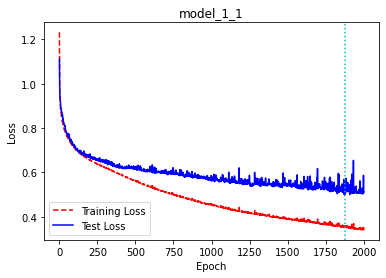

In [89]:
learning_rate = 0.01
batch_size = 64

loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(learning_rate)
metrics = ['accuracy']
model.compile(optimizer, loss_fn, metrics)
checkpoint = ModelCheckpoint('models/model_1', monitor='val_loss', verbose=1,save_best_only=True, mode='min')
model.fit(X_train, y_train, epochs = 2000,  validation_data=(X_test, y_test),batch_size = batch_size,callbacks=[checkpoint], verbose=2)
model.summary()
graph_loss_vs_epochs(model.history, 'loss_vs_epochs_images/model_1_1_le.png', 'model_1_1')
save_history('history_model_1_1', model)

    We can see that even in 2000 epochs, the test loss is still going down. We will try with a greater number of epochs in the next variations (found in other notebooks)

    Now that the model has been trained, we will see how it evaluates the test dataset:

In [90]:
print('\nEvaluating:')
(test_loss, test_accuracy) = model.evaluate(X_test, y_test)
print(f'\nTest accuracy: {test_accuracy * 100:>0.1f}%, test loss: {test_loss:>8f}')


Evaluating:
7/7 [==============================] - 0s 2ms/step - loss: 0.5108 - accuracy: 0.8031

Test accuracy: 80.3%, test loss: 0.510767


    We got 80.3 % of test accuracy and 0.51 for test loss. This seems good, anyway, we will see other variations to improve this.
    
    Now we will analyze a prediction:

In [55]:
print(X_test.shape)
print(X_test[7:8])
print(X_test[7:8].shape)
print("y")
print(y_test[7:8])

(193, 31)
     Tipo de Red_2G  Tipo de Red_3G  Tipo de Red_4G  \
267               0               0               1   

     Estudiante de Tecnología_No  Estudiante de Tecnología_Si  \
267                            1                            0   

     Nivel de Educación_Colegio  Nivel de Educación_Escuela  \
267                           0                           0   

     Nivel de Educación_Universidad  Vive en Ciudad_No  Vive en Ciudad_Si  \
267                               1                  0                  1   

     ...  Tipo de Internet_Compra Megas  Tipo de Internet_Wifi  \
267  ...                              0                      1   

     Situación Financiera_Buena  Situación Financiera_Mala  \
267                           0                          0   

     Situación Financiera_Media  Género_Femenino  Género_Masculino  \
267                           1                0                 1   

     Duración de la Clase_0  Duración de la Clase_01-Mar  \
267    

    We see that the target output is Nivel de Adaptación moderado.
    As the neural network will give us an array of 3 probabilities as prediction, each representing the probability of the target being that class, we will use argmax to get the index of the greatest probability. This index represents the y column number of the output it predicts. In order to get the label, we use the column names and return column name corresponding to the index given.

In [60]:
from numpy import argmax
def get_label(column):
    label = y_test.columns[column]
    return label.replace('Nivel de Adaptación_', '')
prediction = model.predict(X_test[7:8])
print(get_label(argmax(prediction)))

Moderado


###  SECOND APPROACH:
    Another thing we tried was analyzing correlation of all features with each of the output columns, using pearson correlation.
    This method of correlation assigns a value from -1 to 1, 0 meaning NO correlation, 1 meaning positive correlation and -1 meaning negative correlation:
    We will see which variables have at least more than 0.2 of correlation with the output columns:

#### Analyze data correlation:

In [15]:
c1 = dataset_one_hot_encoded.corr(method="pearson")["Nivel de Adaptación_Alto"]
c2 =  dataset_one_hot_encoded.corr(method="pearson")["Nivel de Adaptación_Bajo"]
c3 =  dataset_one_hot_encoded.corr(method="pearson")["Nivel de Adaptación_Moderado"]
print("\nCorrelation with Nivel de Adaptación Alto: ")
print(c1[abs(c1)>0.2])
print("\nCorrelation with Nivel de Adaptación Bajo: ")
print(c2[abs(c2)>0.2])
print("\nCorrelation with Nivel de Adaptación Moderado: ")
print(c3[abs(c3)>0.2])


Correlation with Nivel de Adaptación Alto: 
Situación Financiera_Buena      0.389750
Situación Financiera_Media     -0.234469
Nivel de Adaptación_Alto        1.000000
Nivel de Adaptación_Bajo       -0.251933
Nivel de Adaptación_Moderado   -0.320800
Name: Nivel de Adaptación_Alto, dtype: float64

Correlation with Nivel de Adaptación Bajo: 
Vive en Ciudad_No               0.245294
Vive en Ciudad_Si              -0.245294
Tipo de Instituto_Privado      -0.298710
Tipo de Instituto_Público       0.298710
Duración de la Clase_0          0.410024
Nivel de Adaptación_Alto       -0.251933
Nivel de Adaptación_Bajo        1.000000
Nivel de Adaptación_Moderado   -0.835776
Name: Nivel de Adaptación_Bajo, dtype: float64

Correlation with Nivel de Adaptación Moderado: 
Tipo de Instituto_Privado       0.258213
Tipo de Instituto_Público      -0.258213
Duración de la Clase_0         -0.334453
Nivel de Adaptación_Alto       -0.320800
Nivel de Adaptación_Bajo       -0.835776
Nivel de Adaptación_Moderado 

    We will select the most relevant features:
        situacion financiera, vive en ciudad, tipo de instituto, duracion de la clase
    And fit the dataset to these features:

In [17]:
important_columns = ["Situación Financiera","Vive en Ciudad", "Tipo de Instituto", "Duración de la Clase", "Nivel de Adaptación"]
summarized_dataset = dataset[important_columns]
summarized_dataset

,Situación Financiera,Vive en Ciudad,Tipo de Instituto,Duración de la Clase,Nivel de Adaptación
0,Media,Si,Privado,03-Jun,Bajo
1,Media,Si,Privado,01-Mar,Moderado
2,Mala,Si,Privado,01-Mar,Bajo
3,Media,Si,Privado,01-Mar,Moderado
4,Buena,Si,Privado,01-Mar,Alto
...,...,...,...,...,...
959,Media,Si,Privado,01-Mar,Moderado
960,Media,Si,Privado,01-Mar,Moderado
961,Media,Si,Público,0,Bajo
962,Media,Si,Privado,01-Mar,Moderado


    Again, one-hot encoding is necessary:

In [18]:
summarized_dataset_one_hot_encoded = pd.get_dummies(summarized_dataset)  
summarized_dataset_one_hot_encoded

,Situación Financiera_Buena,Situación Financiera_Mala,Situación Financiera_Media,Vive en Ciudad_No,Vive en Ciudad_Si,Tipo de Instituto_Privado,Tipo de Instituto_Público,Duración de la Clase_0,Duración de la Clase_01-Mar,Duración de la Clase_03-Jun,Nivel de Adaptación_Alto,Nivel de Adaptación_Bajo,Nivel de Adaptación_Moderado
0,0,0,1,0,1,1,0,0,0,1,0,1,0
1,0,0,1,0,1,1,0,0,1,0,0,0,1
2,0,1,0,0,1,1,0,0,1,0,0,1,0
3,0,0,1,0,1,1,0,0,1,0,0,0,1
4,1,0,0,0,1,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,0,0,1,0,1,1,0,0,1,0,0,0,1
960,0,0,1,0,1,1,0,0,1,0,0,0,1
961,0,0,1,0,1,0,1,1,0,0,0,1,0
962,0,0,1,0,1,1,0,0,1,0,0,0,1


    Now that our feature number is lower, the number of columns has reduced to 13, from which the first 10 are x and the las 3 y:

In [19]:
X = summarized_dataset_one_hot_encoded.iloc[:,:10]
X

,Situación Financiera_Buena,Situación Financiera_Mala,Situación Financiera_Media,Vive en Ciudad_No,Vive en Ciudad_Si,Tipo de Instituto_Privado,Tipo de Instituto_Público,Duración de la Clase_0,Duración de la Clase_01-Mar,Duración de la Clase_03-Jun
0,0,0,1,0,1,1,0,0,0,1
1,0,0,1,0,1,1,0,0,1,0
2,0,1,0,0,1,1,0,0,1,0
3,0,0,1,0,1,1,0,0,1,0
4,1,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
959,0,0,1,0,1,1,0,0,1,0
960,0,0,1,0,1,1,0,0,1,0
961,0,0,1,0,1,0,1,1,0,0
962,0,0,1,0,1,1,0,0,1,0


In [20]:
y = summarized_dataset_one_hot_encoded.iloc[:,10:]
y

,Nivel de Adaptación_Alto,Nivel de Adaptación_Bajo,Nivel de Adaptación_Moderado
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,1,0,0
...,...,...,...
959,0,0,1
960,0,0,1
961,0,1,0
962,0,0,1


    Once more, we divide our dataset into training and testing:

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(771, 10) (771, 3)
(193, 10) (193, 3)


    In order to compare both models (the one containing only important features and the one containing all features) and see which is better, we define the exact same model as before, with the same parameters and train it:

Epoch 1/1000

Epoch 1: val_loss improved from inf to 1.06068, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 1s - loss: 1.1091 - accuracy: 0.4578 - val_loss: 1.0607 - val_accuracy: 0.5440 - 1s/epoch - 84ms/step
Epoch 2/1000

Epoch 2: val_loss improved from 1.06068 to 1.01298, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 1s - loss: 1.0539 - accuracy: 0.5357 - val_loss: 1.0130 - val_accuracy: 0.5389 - 609ms/epoch - 47ms/step
Epoch 3/1000

Epoch 3: val_loss improved from 1.01298 to 0.98210, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 1s - loss: 1.0172 - accuracy: 0.5305 - val_loss: 0.9821 - val_accuracy: 0.5389 - 557ms/epoch - 43ms/step
Epoch 4/1000

Epoch 4: val_loss improved from 0.98210 to 0.96187, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 1s - loss: 0.9921 - accuracy: 0.5357 - val_loss: 0.9619 - val_accuracy: 0.5544 - 607ms/epoch

Epoch 34/1000

Epoch 34: val_loss improved from 0.83525 to 0.83249, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 1s - loss: 0.8484 - accuracy: 0.6096 - val_loss: 0.8325 - val_accuracy: 0.6373 - 554ms/epoch - 43ms/step
Epoch 35/1000

Epoch 35: val_loss improved from 0.83249 to 0.83197, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 1s - loss: 0.8469 - accuracy: 0.6096 - val_loss: 0.8320 - val_accuracy: 0.6373 - 653ms/epoch - 50ms/step
Epoch 36/1000

Epoch 36: val_loss improved from 0.83197 to 0.83072, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 1s - loss: 0.8448 - accuracy: 0.6096 - val_loss: 0.8307 - val_accuracy: 0.6373 - 559ms/epoch - 43ms/step
Epoch 37/1000

Epoch 37: val_loss improved from 0.83072 to 0.82898, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 1s - loss: 0.8434 - accuracy: 0.6096 - val_loss: 0.8290 - val_accuracy: 0.637

13/13 - 1s - loss: 0.8093 - accuracy: 0.6316 - val_loss: 0.8019 - val_accuracy: 0.6425 - 589ms/epoch - 45ms/step
Epoch 70/1000

Epoch 70: val_loss did not improve from 0.80192
13/13 - 0s - loss: 0.8085 - accuracy: 0.6316 - val_loss: 0.8024 - val_accuracy: 0.6425 - 48ms/epoch - 4ms/step
Epoch 71/1000

Epoch 71: val_loss improved from 0.80192 to 0.79877, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 1s - loss: 0.8081 - accuracy: 0.6316 - val_loss: 0.7988 - val_accuracy: 0.6425 - 574ms/epoch - 44ms/step
Epoch 72/1000

Epoch 72: val_loss improved from 0.79877 to 0.79633, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 1s - loss: 0.8069 - accuracy: 0.6316 - val_loss: 0.7963 - val_accuracy: 0.6425 - 529ms/epoch - 41ms/step
Epoch 73/1000

Epoch 73: val_loss did not improve from 0.79633
13/13 - 0s - loss: 0.8063 - accuracy: 0.6316 - val_loss: 0.7966 - val_accuracy: 0.6425 - 55ms/epoch - 4ms/step
Epoch 74/1000

Epoch 74: 

Epoch 109/1000

Epoch 109: val_loss did not improve from 0.77661
13/13 - 0s - loss: 0.7871 - accuracy: 0.6342 - val_loss: 0.7785 - val_accuracy: 0.6373 - 52ms/epoch - 4ms/step
Epoch 110/1000

Epoch 110: val_loss improved from 0.77661 to 0.77610, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 1s - loss: 0.7870 - accuracy: 0.6316 - val_loss: 0.7761 - val_accuracy: 0.6425 - 584ms/epoch - 45ms/step
Epoch 111/1000

Epoch 111: val_loss improved from 0.77610 to 0.77282, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 1s - loss: 0.7863 - accuracy: 0.6304 - val_loss: 0.7728 - val_accuracy: 0.6477 - 526ms/epoch - 40ms/step
Epoch 112/1000

Epoch 112: val_loss improved from 0.77282 to 0.77220, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 0s - loss: 0.7861 - accuracy: 0.6407 - val_loss: 0.7722 - val_accuracy: 0.6425 - 453ms/epoch - 35ms/step
Epoch 113/1000

Epoch 113: val_loss improved fr

Epoch 150/1000

Epoch 150: val_loss improved from 0.76044 to 0.75816, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 0s - loss: 0.7745 - accuracy: 0.6368 - val_loss: 0.7582 - val_accuracy: 0.6477 - 468ms/epoch - 36ms/step
Epoch 151/1000

Epoch 151: val_loss did not improve from 0.75816
13/13 - 0s - loss: 0.7740 - accuracy: 0.6381 - val_loss: 0.7596 - val_accuracy: 0.6477 - 47ms/epoch - 4ms/step
Epoch 152/1000

Epoch 152: val_loss did not improve from 0.75816
13/13 - 0s - loss: 0.7739 - accuracy: 0.6316 - val_loss: 0.7593 - val_accuracy: 0.6477 - 48ms/epoch - 4ms/step
Epoch 153/1000

Epoch 153: val_loss did not improve from 0.75816
13/13 - 0s - loss: 0.7736 - accuracy: 0.6381 - val_loss: 0.7624 - val_accuracy: 0.6114 - 58ms/epoch - 4ms/step
Epoch 154/1000

Epoch 154: val_loss did not improve from 0.75816
13/13 - 0s - loss: 0.7734 - accuracy: 0.6381 - val_loss: 0.7623 - val_accuracy: 0.6114 - 58ms/epoch - 4ms/step
Epoch 155/1000

Epoch 155: val_loss d

Epoch 193/1000

Epoch 193: val_loss did not improve from 0.74419
13/13 - 0s - loss: 0.7650 - accuracy: 0.6420 - val_loss: 0.7456 - val_accuracy: 0.6166 - 44ms/epoch - 3ms/step
Epoch 194/1000

Epoch 194: val_loss did not improve from 0.74419
13/13 - 0s - loss: 0.7648 - accuracy: 0.6420 - val_loss: 0.7474 - val_accuracy: 0.6166 - 68ms/epoch - 5ms/step
Epoch 195/1000

Epoch 195: val_loss did not improve from 0.74419
13/13 - 0s - loss: 0.7646 - accuracy: 0.6420 - val_loss: 0.7520 - val_accuracy: 0.6114 - 78ms/epoch - 6ms/step
Epoch 196/1000

Epoch 196: val_loss did not improve from 0.74419
13/13 - 0s - loss: 0.7648 - accuracy: 0.6420 - val_loss: 0.7509 - val_accuracy: 0.6114 - 59ms/epoch - 5ms/step
Epoch 197/1000

Epoch 197: val_loss did not improve from 0.74419
13/13 - 0s - loss: 0.7647 - accuracy: 0.6420 - val_loss: 0.7493 - val_accuracy: 0.6166 - 55ms/epoch - 4ms/step
Epoch 198/1000

Epoch 198: val_loss did not improve from 0.74419
13/13 - 0s - loss: 0.7643 - accuracy: 0.6420 - val_loss

INFO:tensorflow:Assets written to: model_12\assets
13/13 - 1s - loss: 0.7593 - accuracy: 0.6446 - val_loss: 0.7323 - val_accuracy: 0.6632 - 520ms/epoch - 40ms/step
Epoch 237/1000

Epoch 237: val_loss improved from 0.73233 to 0.73183, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 1s - loss: 0.7597 - accuracy: 0.6420 - val_loss: 0.7318 - val_accuracy: 0.6632 - 527ms/epoch - 41ms/step
Epoch 238/1000

Epoch 238: val_loss did not improve from 0.73183
13/13 - 0s - loss: 0.7596 - accuracy: 0.6446 - val_loss: 0.7350 - val_accuracy: 0.6321 - 58ms/epoch - 4ms/step
Epoch 239/1000

Epoch 239: val_loss did not improve from 0.73183
13/13 - 0s - loss: 0.7590 - accuracy: 0.6446 - val_loss: 0.7358 - val_accuracy: 0.6166 - 41ms/epoch - 3ms/step
Epoch 240/1000

Epoch 240: val_loss did not improve from 0.73183
13/13 - 0s - loss: 0.7588 - accuracy: 0.6420 - val_loss: 0.7354 - val_accuracy: 0.6166 - 44ms/epoch - 3ms/step
Epoch 241/1000

Epoch 241: val_loss did not impro

13/13 - 0s - loss: 0.7557 - accuracy: 0.6420 - val_loss: 0.7312 - val_accuracy: 0.6477 - 51ms/epoch - 4ms/step
Epoch 282/1000

Epoch 282: val_loss improved from 0.73029 to 0.72951, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 0s - loss: 0.7554 - accuracy: 0.6381 - val_loss: 0.7295 - val_accuracy: 0.6477 - 443ms/epoch - 34ms/step
Epoch 283/1000

Epoch 283: val_loss did not improve from 0.72951
13/13 - 0s - loss: 0.7553 - accuracy: 0.6420 - val_loss: 0.7302 - val_accuracy: 0.6166 - 50ms/epoch - 4ms/step
Epoch 284/1000

Epoch 284: val_loss did not improve from 0.72951
13/13 - 0s - loss: 0.7553 - accuracy: 0.6446 - val_loss: 0.7335 - val_accuracy: 0.6166 - 42ms/epoch - 3ms/step
Epoch 285/1000

Epoch 285: val_loss improved from 0.72951 to 0.72865, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 0s - loss: 0.7552 - accuracy: 0.6446 - val_loss: 0.7287 - val_accuracy: 0.6632 - 480ms/epoch - 37ms/step
Epoch 286/1000

Epo

13/13 - 0s - loss: 0.7530 - accuracy: 0.6459 - val_loss: 0.7282 - val_accuracy: 0.6166 - 63ms/epoch - 5ms/step
Epoch 324/1000

Epoch 324: val_loss did not improve from 0.72312
13/13 - 0s - loss: 0.7529 - accuracy: 0.6459 - val_loss: 0.7260 - val_accuracy: 0.6632 - 43ms/epoch - 3ms/step
Epoch 325/1000

Epoch 325: val_loss did not improve from 0.72312
13/13 - 0s - loss: 0.7529 - accuracy: 0.6407 - val_loss: 0.7322 - val_accuracy: 0.6166 - 46ms/epoch - 4ms/step
Epoch 326/1000

Epoch 326: val_loss did not improve from 0.72312
13/13 - 0s - loss: 0.7531 - accuracy: 0.6459 - val_loss: 0.7273 - val_accuracy: 0.6477 - 79ms/epoch - 6ms/step
Epoch 327/1000

Epoch 327: val_loss improved from 0.72312 to 0.72298, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 1s - loss: 0.7528 - accuracy: 0.6368 - val_loss: 0.7230 - val_accuracy: 0.6943 - 609ms/epoch - 47ms/step
Epoch 328/1000

Epoch 328: val_loss did not improve from 0.72298
13/13 - 0s - loss: 0.7534 - accuracy:

Epoch 369/1000

Epoch 369: val_loss improved from 0.72061 to 0.71961, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 1s - loss: 0.7508 - accuracy: 0.6459 - val_loss: 0.7196 - val_accuracy: 0.6943 - 577ms/epoch - 44ms/step
Epoch 370/1000

Epoch 370: val_loss did not improve from 0.71961
13/13 - 0s - loss: 0.7512 - accuracy: 0.6459 - val_loss: 0.7211 - val_accuracy: 0.6943 - 60ms/epoch - 5ms/step
Epoch 371/1000

Epoch 371: val_loss did not improve from 0.71961
13/13 - 0s - loss: 0.7512 - accuracy: 0.6252 - val_loss: 0.7214 - val_accuracy: 0.6477 - 75ms/epoch - 6ms/step
Epoch 372/1000

Epoch 372: val_loss did not improve from 0.71961
13/13 - 0s - loss: 0.7511 - accuracy: 0.6472 - val_loss: 0.7288 - val_accuracy: 0.6321 - 50ms/epoch - 4ms/step
Epoch 373/1000

Epoch 373: val_loss did not improve from 0.71961
13/13 - 0s - loss: 0.7513 - accuracy: 0.6485 - val_loss: 0.7296 - val_accuracy: 0.6373 - 53ms/epoch - 4ms/step
Epoch 374/1000

Epoch 374: val_loss d

Epoch 415/1000

Epoch 415: val_loss did not improve from 0.71770
13/13 - 0s - loss: 0.7493 - accuracy: 0.6472 - val_loss: 0.7201 - val_accuracy: 0.6477 - 42ms/epoch - 3ms/step
Epoch 416/1000

Epoch 416: val_loss did not improve from 0.71770
13/13 - 0s - loss: 0.7493 - accuracy: 0.6472 - val_loss: 0.7180 - val_accuracy: 0.6788 - 56ms/epoch - 4ms/step
Epoch 417/1000

Epoch 417: val_loss did not improve from 0.71770
13/13 - 0s - loss: 0.7498 - accuracy: 0.6381 - val_loss: 0.7182 - val_accuracy: 0.6788 - 46ms/epoch - 4ms/step
Epoch 418/1000

Epoch 418: val_loss did not improve from 0.71770
13/13 - 0s - loss: 0.7496 - accuracy: 0.6459 - val_loss: 0.7205 - val_accuracy: 0.6580 - 51ms/epoch - 4ms/step
Epoch 419/1000

Epoch 419: val_loss improved from 0.71770 to 0.71709, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 1s - loss: 0.7495 - accuracy: 0.6459 - val_loss: 0.7171 - val_accuracy: 0.6788 - 516ms/epoch - 40ms/step
Epoch 420/1000

Epoch 420: val_loss i

Epoch 460/1000

Epoch 460: val_loss did not improve from 0.71600
13/13 - 0s - loss: 0.7484 - accuracy: 0.6524 - val_loss: 0.7192 - val_accuracy: 0.6788 - 91ms/epoch - 7ms/step
Epoch 461/1000

Epoch 461: val_loss did not improve from 0.71600
13/13 - 0s - loss: 0.7484 - accuracy: 0.6394 - val_loss: 0.7180 - val_accuracy: 0.6788 - 82ms/epoch - 6ms/step
Epoch 462/1000

Epoch 462: val_loss improved from 0.71600 to 0.71541, saving model to model_12
INFO:tensorflow:Assets written to: model_12\assets
13/13 - 1s - loss: 0.7483 - accuracy: 0.6485 - val_loss: 0.7154 - val_accuracy: 0.6788 - 551ms/epoch - 42ms/step
Epoch 463/1000

Epoch 463: val_loss did not improve from 0.71541
13/13 - 0s - loss: 0.7489 - accuracy: 0.6407 - val_loss: 0.7181 - val_accuracy: 0.6788 - 43ms/epoch - 3ms/step
Epoch 464/1000

Epoch 464: val_loss did not improve from 0.71541
13/13 - 0s - loss: 0.7485 - accuracy: 0.6433 - val_loss: 0.7225 - val_accuracy: 0.6477 - 55ms/epoch - 4ms/step
Epoch 465/1000

Epoch 465: val_loss d


Epoch 506: val_loss did not improve from 0.71541
13/13 - 0s - loss: 0.7473 - accuracy: 0.6511 - val_loss: 0.7180 - val_accuracy: 0.6477 - 62ms/epoch - 5ms/step
Epoch 507/1000

Epoch 507: val_loss did not improve from 0.71541
13/13 - 0s - loss: 0.7473 - accuracy: 0.6511 - val_loss: 0.7176 - val_accuracy: 0.6477 - 57ms/epoch - 4ms/step
Epoch 508/1000

Epoch 508: val_loss did not improve from 0.71541
13/13 - 0s - loss: 0.7472 - accuracy: 0.6472 - val_loss: 0.7242 - val_accuracy: 0.6477 - 58ms/epoch - 4ms/step
Epoch 509/1000

Epoch 509: val_loss did not improve from 0.71541
13/13 - 0s - loss: 0.7471 - accuracy: 0.6511 - val_loss: 0.7290 - val_accuracy: 0.6321 - 63ms/epoch - 5ms/step
Epoch 510/1000

Epoch 510: val_loss did not improve from 0.71541
13/13 - 0s - loss: 0.7478 - accuracy: 0.6511 - val_loss: 0.7214 - val_accuracy: 0.6477 - 55ms/epoch - 4ms/step
Epoch 511/1000

Epoch 511: val_loss did not improve from 0.71541
13/13 - 0s - loss: 0.7469 - accuracy: 0.6511 - val_loss: 0.7180 - val_

13/13 - 0s - loss: 0.7466 - accuracy: 0.6537 - val_loss: 0.7188 - val_accuracy: 0.6477 - 56ms/epoch - 4ms/step
Epoch 553/1000

Epoch 553: val_loss did not improve from 0.71499
13/13 - 0s - loss: 0.7463 - accuracy: 0.6537 - val_loss: 0.7217 - val_accuracy: 0.6477 - 69ms/epoch - 5ms/step
Epoch 554/1000

Epoch 554: val_loss did not improve from 0.71499
13/13 - 0s - loss: 0.7461 - accuracy: 0.6537 - val_loss: 0.7216 - val_accuracy: 0.6477 - 70ms/epoch - 5ms/step
Epoch 555/1000

Epoch 555: val_loss did not improve from 0.71499
13/13 - 0s - loss: 0.7461 - accuracy: 0.6537 - val_loss: 0.7220 - val_accuracy: 0.6477 - 64ms/epoch - 5ms/step
Epoch 556/1000

Epoch 556: val_loss did not improve from 0.71499
13/13 - 0s - loss: 0.7462 - accuracy: 0.6537 - val_loss: 0.7209 - val_accuracy: 0.6477 - 66ms/epoch - 5ms/step
Epoch 557/1000

Epoch 557: val_loss did not improve from 0.71499
13/13 - 0s - loss: 0.7461 - accuracy: 0.6537 - val_loss: 0.7274 - val_accuracy: 0.6321 - 52ms/epoch - 4ms/step
Epoch 558

Epoch 599/1000

Epoch 599: val_loss did not improve from 0.71499
13/13 - 0s - loss: 0.7453 - accuracy: 0.6537 - val_loss: 0.7158 - val_accuracy: 0.6788 - 65ms/epoch - 5ms/step
Epoch 600/1000

Epoch 600: val_loss did not improve from 0.71499
13/13 - 0s - loss: 0.7453 - accuracy: 0.6524 - val_loss: 0.7166 - val_accuracy: 0.6788 - 82ms/epoch - 6ms/step
Epoch 601/1000

Epoch 601: val_loss did not improve from 0.71499
13/13 - 0s - loss: 0.7452 - accuracy: 0.6589 - val_loss: 0.7155 - val_accuracy: 0.6788 - 81ms/epoch - 6ms/step
Epoch 602/1000

Epoch 602: val_loss did not improve from 0.71499
13/13 - 0s - loss: 0.7453 - accuracy: 0.6498 - val_loss: 0.7152 - val_accuracy: 0.6788 - 81ms/epoch - 6ms/step
Epoch 603/1000

Epoch 603: val_loss did not improve from 0.71499
13/13 - 0s - loss: 0.7455 - accuracy: 0.6472 - val_loss: 0.7170 - val_accuracy: 0.6788 - 68ms/epoch - 5ms/step
Epoch 604/1000

Epoch 604: val_loss did not improve from 0.71499
13/13 - 0s - loss: 0.7452 - accuracy: 0.6524 - val_loss

Epoch 646/1000

Epoch 646: val_loss did not improve from 0.71499
13/13 - 0s - loss: 0.7451 - accuracy: 0.6394 - val_loss: 0.7208 - val_accuracy: 0.6477 - 45ms/epoch - 3ms/step
Epoch 647/1000

Epoch 647: val_loss did not improve from 0.71499
13/13 - 0s - loss: 0.7441 - accuracy: 0.6537 - val_loss: 0.7249 - val_accuracy: 0.6321 - 76ms/epoch - 6ms/step
Epoch 648/1000

Epoch 648: val_loss did not improve from 0.71499
13/13 - 0s - loss: 0.7441 - accuracy: 0.6524 - val_loss: 0.7247 - val_accuracy: 0.6321 - 65ms/epoch - 5ms/step
Epoch 649/1000

Epoch 649: val_loss did not improve from 0.71499
13/13 - 0s - loss: 0.7443 - accuracy: 0.6511 - val_loss: 0.7229 - val_accuracy: 0.6321 - 62ms/epoch - 5ms/step
Epoch 650/1000

Epoch 650: val_loss did not improve from 0.71499
13/13 - 0s - loss: 0.7444 - accuracy: 0.6537 - val_loss: 0.7226 - val_accuracy: 0.6321 - 55ms/epoch - 4ms/step
Epoch 651/1000

Epoch 651: val_loss did not improve from 0.71499
13/13 - 0s - loss: 0.7444 - accuracy: 0.6420 - val_loss

Epoch 693/1000

Epoch 693: val_loss did not improve from 0.71499
13/13 - 0s - loss: 0.7433 - accuracy: 0.6537 - val_loss: 0.7278 - val_accuracy: 0.6321 - 62ms/epoch - 5ms/step
Epoch 694/1000

Epoch 694: val_loss did not improve from 0.71499
13/13 - 0s - loss: 0.7440 - accuracy: 0.6537 - val_loss: 0.7259 - val_accuracy: 0.6321 - 73ms/epoch - 6ms/step
Epoch 695/1000

Epoch 695: val_loss did not improve from 0.71499
13/13 - 0s - loss: 0.7435 - accuracy: 0.6537 - val_loss: 0.7233 - val_accuracy: 0.6477 - 61ms/epoch - 5ms/step
Epoch 696/1000

Epoch 696: val_loss did not improve from 0.71499
13/13 - 0s - loss: 0.7434 - accuracy: 0.6537 - val_loss: 0.7190 - val_accuracy: 0.6477 - 65ms/epoch - 5ms/step
Epoch 697/1000

Epoch 697: val_loss did not improve from 0.71499
13/13 - 0s - loss: 0.7436 - accuracy: 0.6537 - val_loss: 0.7177 - val_accuracy: 0.6477 - 68ms/epoch - 5ms/step
Epoch 698/1000

Epoch 698: val_loss did not improve from 0.71499
13/13 - 0s - loss: 0.7436 - accuracy: 0.6537 - val_loss


Epoch 739: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7428 - accuracy: 0.6537 - val_loss: 0.7223 - val_accuracy: 0.6477 - 46ms/epoch - 4ms/step
Epoch 740/1000

Epoch 740: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7430 - accuracy: 0.6537 - val_loss: 0.7284 - val_accuracy: 0.6321 - 39ms/epoch - 3ms/step
Epoch 741/1000

Epoch 741: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7434 - accuracy: 0.6524 - val_loss: 0.7342 - val_accuracy: 0.6321 - 41ms/epoch - 3ms/step
Epoch 742/1000

Epoch 742: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7445 - accuracy: 0.6537 - val_loss: 0.7274 - val_accuracy: 0.6321 - 52ms/epoch - 4ms/step
Epoch 743/1000

Epoch 743: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7432 - accuracy: 0.6537 - val_loss: 0.7213 - val_accuracy: 0.6477 - 45ms/epoch - 3ms/step
Epoch 744/1000

Epoch 744: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7426 - accuracy: 0.6537 - val_loss: 0.7260 - val_

Epoch 786/1000

Epoch 786: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7419 - accuracy: 0.6537 - val_loss: 0.7204 - val_accuracy: 0.6477 - 89ms/epoch - 7ms/step
Epoch 787/1000

Epoch 787: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7419 - accuracy: 0.6537 - val_loss: 0.7275 - val_accuracy: 0.6321 - 48ms/epoch - 4ms/step
Epoch 788/1000

Epoch 788: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7425 - accuracy: 0.6537 - val_loss: 0.7208 - val_accuracy: 0.6477 - 39ms/epoch - 3ms/step
Epoch 789/1000

Epoch 789: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7418 - accuracy: 0.6537 - val_loss: 0.7224 - val_accuracy: 0.6477 - 63ms/epoch - 5ms/step
Epoch 790/1000

Epoch 790: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7417 - accuracy: 0.6537 - val_loss: 0.7281 - val_accuracy: 0.6321 - 70ms/epoch - 5ms/step
Epoch 791/1000

Epoch 791: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7429 - accuracy: 0.6537 - val_loss

Epoch 833/1000

Epoch 833: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7420 - accuracy: 0.6498 - val_loss: 0.7194 - val_accuracy: 0.6632 - 70ms/epoch - 5ms/step
Epoch 834/1000

Epoch 834: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7419 - accuracy: 0.6511 - val_loss: 0.7219 - val_accuracy: 0.6321 - 87ms/epoch - 7ms/step
Epoch 835/1000

Epoch 835: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7417 - accuracy: 0.6537 - val_loss: 0.7221 - val_accuracy: 0.6321 - 67ms/epoch - 5ms/step
Epoch 836/1000

Epoch 836: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7417 - accuracy: 0.6472 - val_loss: 0.7219 - val_accuracy: 0.6321 - 76ms/epoch - 6ms/step
Epoch 837/1000

Epoch 837: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7418 - accuracy: 0.6459 - val_loss: 0.7183 - val_accuracy: 0.6788 - 83ms/epoch - 6ms/step
Epoch 838/1000

Epoch 838: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7418 - accuracy: 0.6459 - val_loss

Epoch 880/1000

Epoch 880: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7406 - accuracy: 0.6537 - val_loss: 0.7205 - val_accuracy: 0.6477 - 72ms/epoch - 6ms/step
Epoch 881/1000

Epoch 881: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7409 - accuracy: 0.6537 - val_loss: 0.7228 - val_accuracy: 0.6321 - 65ms/epoch - 5ms/step
Epoch 882/1000

Epoch 882: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7408 - accuracy: 0.6537 - val_loss: 0.7260 - val_accuracy: 0.6321 - 71ms/epoch - 5ms/step
Epoch 883/1000

Epoch 883: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7410 - accuracy: 0.6537 - val_loss: 0.7207 - val_accuracy: 0.6477 - 73ms/epoch - 6ms/step
Epoch 884/1000

Epoch 884: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7407 - accuracy: 0.6524 - val_loss: 0.7188 - val_accuracy: 0.6477 - 58ms/epoch - 4ms/step
Epoch 885/1000

Epoch 885: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7409 - accuracy: 0.6537 - val_loss

Epoch 927/1000

Epoch 927: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7409 - accuracy: 0.6537 - val_loss: 0.7216 - val_accuracy: 0.6477 - 62ms/epoch - 5ms/step
Epoch 928/1000

Epoch 928: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7404 - accuracy: 0.6511 - val_loss: 0.7241 - val_accuracy: 0.6321 - 65ms/epoch - 5ms/step
Epoch 929/1000

Epoch 929: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7403 - accuracy: 0.6537 - val_loss: 0.7239 - val_accuracy: 0.6321 - 59ms/epoch - 5ms/step
Epoch 930/1000

Epoch 930: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7404 - accuracy: 0.6537 - val_loss: 0.7253 - val_accuracy: 0.6321 - 69ms/epoch - 5ms/step
Epoch 931/1000

Epoch 931: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7407 - accuracy: 0.6537 - val_loss: 0.7194 - val_accuracy: 0.6788 - 50ms/epoch - 4ms/step
Epoch 932/1000

Epoch 932: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7406 - accuracy: 0.6550 - val_loss

Epoch 974/1000

Epoch 974: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7406 - accuracy: 0.6433 - val_loss: 0.7191 - val_accuracy: 0.6788 - 67ms/epoch - 5ms/step
Epoch 975/1000

Epoch 975: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7402 - accuracy: 0.6537 - val_loss: 0.7198 - val_accuracy: 0.6477 - 64ms/epoch - 5ms/step
Epoch 976/1000

Epoch 976: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7400 - accuracy: 0.6524 - val_loss: 0.7177 - val_accuracy: 0.7098 - 56ms/epoch - 4ms/step
Epoch 977/1000

Epoch 977: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7405 - accuracy: 0.6342 - val_loss: 0.7173 - val_accuracy: 0.7098 - 68ms/epoch - 5ms/step
Epoch 978/1000

Epoch 978: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7407 - accuracy: 0.6446 - val_loss: 0.7217 - val_accuracy: 0.6477 - 76ms/epoch - 6ms/step
Epoch 979/1000

Epoch 979: val_loss did not improve from 0.71475
13/13 - 0s - loss: 0.7398 - accuracy: 0.6537 - val_loss

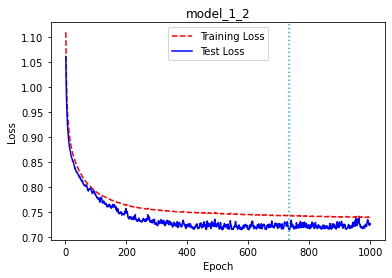

In [22]:
model = tf.keras.Sequential([      
      tf.keras.layers.Dense(20, activation='relu'),
      tf.keras.layers.Dense(3)
    ])
learning_rate = 0.01
batch_size = 64

loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(learning_rate)
metrics = ['accuracy']
model.compile(optimizer, loss_fn, metrics)
#plot_model(model, to_file='model_images/model_1_2m.png', show_shapes=True)
checkpoint = ModelCheckpoint('model_12', monitor='val_loss', verbose=1,save_best_only=True, mode='min')
model.fit(X_train, y_train, epochs = 1000,  validation_data=(X_test, y_test),batch_size = batch_size,callbacks=[checkpoint], verbose=2)
model.summary()
graph_loss_vs_epochs(model.history, 'loss_vs_epochs_images/model_1_2_le.png', 'model_1_2')
save_history('history_model_1_1', model)

In [27]:
print('\nEvaluating:')
(test_loss, test_accuracy) = model.evaluate(X_test, y_test)
print(f'\nTest accuracy: {test_accuracy * 100:>0.1f}%, test loss: {test_loss:>8f}')
print(X_test.shape)
X_test[7:8]


Evaluating:
7/7 [==============================] - 0s 4ms/step - loss: 0.7260 - accuracy: 0.6321

Test accuracy: 63.2%, test loss: 0.726015
(193, 10)


,Situación Financiera_Buena,Situación Financiera_Mala,Situación Financiera_Media,Vive en Ciudad_No,Vive en Ciudad_Si,Tipo de Instituto_Privado,Tipo de Instituto_Público,Duración de la Clase_0,Duración de la Clase_01-Mar,Duración de la Clase_03-Jun
267,0,0,1,0,1,1,0,0,0,1


In [28]:
print("y")
print(get_label(argmax(prediction)))
y_test[7:8]

y
Nivel de Adaptación_Moderado


,Nivel de Adaptación_Alto,Nivel de Adaptación_Bajo,Nivel de Adaptación_Moderado
267,0,0,1


    In this case, we got worse results when selecting the most 'relevant' columns from the dataset. This means that it is better to use all the columns. As we saw in the correlation values, most of them were low, reaching maximum 0.4, which tells us that all columns have a small impact but still impact in the target output.
    Having tried this, we will perform the experiments with the whole dataset, containing 34 columns.

#### Experiments and Hypotheses:
    As explained previously, our 4 models were trained with different parameters (variants) in folders:
        MODEL 1 represents a 1-hidden Dense layer architecture
        MODEL 2 represents a 2-hidden Dense layers architecture
        MODEL 3 represents a 3-hidden Dense layers architecture
        MODEL 4 represents a 4-hidden Dense layers architecture
         Variations for models 1 (1 hidden Dense layer) and 3 (3 hidden Dense layers) are performed in TiaraModels folder
         Variations for models 2 (2 hidden Dense layers)and 4 (4 hidden Dense layers) are performed in CaroModels folder
    The variations we tried are the following:

#### Model 1 variations:

In [5]:
variations_model_1 = pd.read_csv('model_variations_description/model_1.csv', encoding='utf-8')
variations_model_1

,Variation,# of hidden Dense layers,learning_rate,batch_size,loss_fn,optimizer,Dense layer activation fn,Dense layer units,Dropout layer,best_test_loss,best_test_accuracy
0,1,1,0.005,64,CategoricalCrossentropy,SGD,relu,20,no,0.495241,80.30%
1,2,1,0.001,64,CategoricalCrossentropy,SGD,relu,20,no,0.495241,80.30%
2,3,1,0.001,32,CategoricalCrossentropy,SGD,relu,64,no,0.464396,80.30%
3,4,1,0.005,32,CategoricalCrossentropy,Adam,relu,128,no,0.342554,85%
4,5,1,0.005,32,CategoricalCrossentropy,Adam,sigmoid,128,no,0.392604,85.50%
5,6,1,0.005,32,CategoricalCrossentropy,Adam,tanh,128,no,0.415778,81.90%
6,7,1,0.002,32,CategoricalCrossentropy,Adam,sigmoid,16,yes - 0.2,0.405858,82.90%


       Graphing model 1 version 5 (best model) history of loss vs epochs we get:

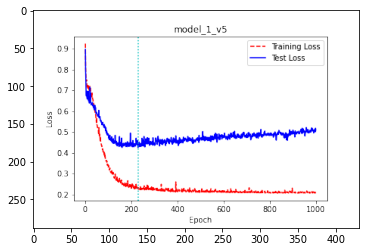

In [14]:
plt.imshow(plt.imread('TiaraModels/loss_vs_epochs_images/model_1_v5_le.png'))
plt.show()

    Variation 4 has a better test accuracy but worse test loss, and Variation 5 has a better test loss but worse test accuracy.
    Submitting both models in kaggle, we got the following results:

          public score | private score
     V4 |     0.92805  |   0.86274
     V5 |     0.90647  |   0.89215
    ----------------------------------------
    Version 5 was our best result model for the private score! So having a better test accuracy was better for us than having lower test loss.

#### Model 2 variations:

In [13]:
variations_model_2 = pd.read_csv('model_variations_description/model_2.csv', encoding='utf-8',delimiter=";")
variations_model_2

,Variation,# of hidden Dense layers,learning_rate,batch_size,loss_fn,optimizer,Dense layer activation fn,Dense layer units,Dropout layer,best_test_loss,best_test_accuracy
0,1,2,0.010,64,CategoricalCrossentropy,Adam,"relu,relu",10_10,no,0.386146,83.4%
1,2,2,0.005,64,CategoricalCrossentropy,Adam,"relu,relu",20_20,no,0.441027,81.3%
2,3,2,0.001,64,CategoricalCrossentropy,Adam,"relu,relu",10_20,no,0.441350,82.4%
3,4,2,0.010,32,CategoricalCrossentropy,Adam,"relu,relu",128_64,no,0.415200,82.9%
4,5,2,0.005,32,CategoricalCrossentropy,Adam,"relu,relu",128_128,no,0.407637,82.4%
5,6,2,0.001,16,CategoricalCrossentropy,Adam,"relu,relu",128_192,no,0.396697,80.8%
6,7,2,0.001,32,CategoricalCrossentropy,Adam,"relu,relu",64_96,no,0.396529,85.0%
7,8,2,0.020,32,CategoricalCrossentropy,Adam,"relu,relu",32_32,no,0.388416,83.4%
8,9,2,0.001,32,CategoricalCrossentropy,Adam,"sigmoid,sigmoid",10_10,no,0.457763,80.3%


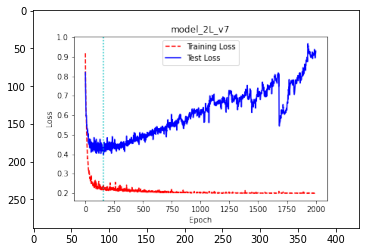

In [17]:
plt.imshow(plt.imread('CaroModels/loss_vs_epochs_images/model_2L_v7_le.png'))
plt.show()

With 2 hidden layers, we obtained a maximum test accuracy of 85% with variant 7 and a minimum test loss of 0.388416 with variant 8. In most variations the accuracy was greater than 80%, but it did not seem good against others with equal to or greater than 85, the loss test, remained in a range of 0.38 to 0.45

#### Model 3 variations:

In [6]:
variations_model_3 = pd.read_csv('model_variations_description/model_3.csv', encoding='utf-8')
variations_model_3

,Variation,# of hidden Dense layers,learning_rate,batch_size,loss_fn,optimizer,Dense layer activation fn,Dense layer units,Dropout layer,best_test_loss,best_test_accuracy
0,1,3,0.005,64,CategoricalCrossentropy,SGD,"relu, relu, relu","16, 16, 16",no,0.508156,78.20%
1,2,3,0.005,64,CategoricalCrossentropy,SGD,"relu, relu, relu","128, 64, 16",no,0.426403,82.40%
2,3,3,0.005,64,CategoricalCrossentropy,Adam,"relu, relu, relu","128, 64, 16",no,0.397000,83.40%
3,4,3,0.005,64,CategoricalCrossentropy,Adam,"tanh, tanh, tanh","128, 64, 16",no,0.369002,83.9%
4,5,3,0.005,64,CategoricalCrossentropy,Adam,"sigmoid, sigmoid, sigmoid","128, 64, 16",no,0.383049,82.90%
5,6,3,0.005,64,CategoricalCrossentropy,Adam,"tanh, tanh, tanh","128, 64, 16",yes - 0.2 - between layer 2 and 3,0.351463,83.90%
6,7,3,0.005,64,CategoricalCrossentropy,Adam,"tanh, tanh, tanh","128, 64, 16",yes - 0.2 - between layer 1-2 and 2-3,0.420426,81.90%


    With 3 hidden layers, we got a maximum test accuracy of 83.9% and minimum test loss of 0.351463, in version 6, with tanh as activation fn for hidden layers and a dropout layer between the 2 last hidden layers.
    Graphing its history of loss vs epochs we have:

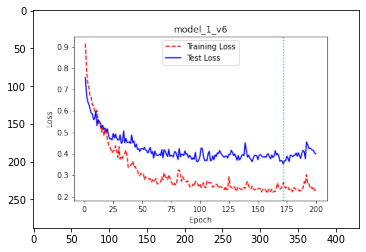

In [15]:
plt.imshow(plt.imread('TiaraModels/loss_vs_epochs_images/model_3_v6_le.png'))
plt.show()

    Since 83.9% does not improve prior accuracies, we did not submit this model.

#### Model 4 variations:

In [18]:
variations_model_4 = pd.read_csv('model_variations_description/model_4.csv', encoding='utf-8', delimiter=";")
variations_model_4

,Variation,# of hidden Dense layers,learning_rate,batch_size,loss_fn,optimizer,Dense layer activation fn,Dense layer units,Dropout layer,best_test_loss,best_test_accuracy
0,1,4,0.001,32,CategoricalCrossentropy,Adam,"relu,relu,relu,relu",32_32_64_64,no,0.419721,81.9%
1,2,4,0.010,32,CategoricalCrossentropy,Adam,"relu,relu,relu,relu",32_32_64_64,no,0.328615,83.9%
2,3,4,0.005,64,CategoricalCrossentropy,Adam,"relu,relu,relu,relu",64_64_64_64,no,0.385139,83.9%
3,4,4,0.001,64,CategoricalCrossentropy,Adam,"relu,relu,relu,relu",16_16_16_16,no,0.417625,87.0%
4,5,4,0.005,32,CategoricalCrossentropy,Adam,"sigmoid,sigmoid,sigmoid,sigmoid",16_16_32_32,no,0.405291,82.9%


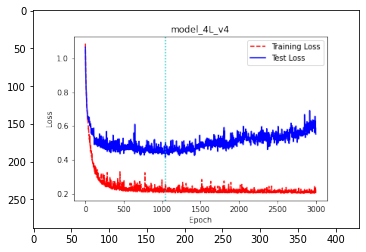

In [20]:
plt.imshow(plt.imread('CaroModels/loss_vs_epochs_images/model_4L_v4_le.png'))
plt.show()

With 4 hidden layers, we obtained a maximum test accuracy of 87% with variant 4 and a minimum test loss of 0.328615 with variant 2. In most variations the accuracy was greater than 82%, the test of loss, remained in a range of 0.32 to 0.42

    Now we will compare the best variation we obtained for each of the 4 models (chosen based on the highest accuracy gotten), in terms of test loss and test accuracy, in order to choose the best one:

In [42]:
best_model_1_history = load_history('TiaraModels/history/history_model_1_v5.npy')
best_model_3_history =  load_history('TiaraModels/history/history_model_3_v6.npy')
best_model_2_history = load_history('CaroModels/history/history_model_2L_v7.npy')
best_model_4_history =  load_history('CaroModels/history/history_model_4L_v4.npy')

#### Test loss:

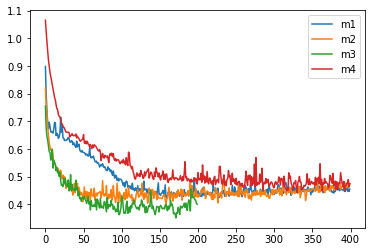

In [43]:
b_model_1_loss = best_model_1_history['val_loss'][:400]
b_model_3_loss = best_model_3_history['val_loss']
b_model_2_loss = best_model_2_history['val_loss'][:400]
b_model_4_loss = best_model_4_history['val_loss'][:400]
plt.plot(range(len(b_model_1_loss)),b_model_1_loss)
plt.plot(range(len(b_model_2_loss)),b_model_2_loss)
plt.plot(range(len(b_model_3_loss)),b_model_3_loss)
plt.plot(range(len(b_model_4_loss)),b_model_4_loss)
plt.legend(['m1','m2','m3','m4'])

    In terms of test loss, the best version for model 3 got the lowest loss. However, the best variations were chosen by accuracy, so we will compare their accuracy:

#### Test accuracy:

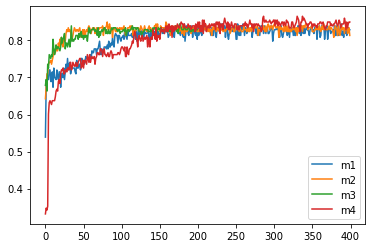

In [47]:
b_model_1_loss = best_model_1_history['val_accuracy'][:400]
b_model_3_loss = best_model_3_history['val_accuracy']
b_model_2_loss = best_model_2_history['val_accuracy'][:400]
b_model_4_loss = best_model_4_history['val_accuracy'][:400]
plt.plot(range(len(b_model_1_loss)),b_model_1_loss)
plt.plot(range(len(b_model_2_loss)),b_model_2_loss)
plt.plot(range(len(b_model_3_loss)),b_model_3_loss)
plt.plot(range(len(b_model_4_loss)),b_model_4_loss)
plt.legend(['m1','m2','m3','m4'])

    In terms of accuracy, the best test accuracy was obtained with the best version of model 4. However, accuracies are relatively close to each other, and we got the best results with model 1 version 5 in kaggle.

### Assigning labels to test-ds
    In order to test our models in the KAGGLE competition, we must assign labels to test-ds csv, which contains the testing data for the competition:

In [91]:
test_ds = pd.read_csv('test-ds.csv', encoding='utf-8')
print(type(test_ds))
test_ds[:10]

<class 'pandas.core.frame.DataFrame'>


,Tipo de Red,Estudiante de Tecnología,Nivel de Educación,Vive en Ciudad,Tipo de Instituto,Edad,Dispositivo,Tipo de Internet,Situación Financiera,Género,Duración de la Clase
0,3G,No,Colegio,No,Público,21-25,Smartphone,Compra Megas,Mala,Masculino,01-Mar
1,4G,No,Colegio,No,Privado,16-20,Smartphone,Wifi,Media,Femenino,01-Mar
2,4G,No,Universidad,Si,Público,21-25,Smartphone,Compra Megas,Media,Masculino,0
3,3G,Si,Universidad,No,Público,21-25,Smartphone,Compra Megas,Media,Masculino,01-Mar
4,3G,No,Escuela,No,Público,06-Oct,Smartphone,Compra Megas,Media,Femenino,0
5,4G,No,Escuela,Si,Privado,06-Oct,Smartphone,Wifi,Buena,Femenino,01-Mar
6,3G,No,Escuela,No,Público,Nov-15,Smartphone,Compra Megas,Media,Femenino,0
7,3G,Si,Escuela,Si,Privado,Nov-15,Smartphone,Compra Megas,Media,Femenino,01-Mar
8,3G,Si,Universidad,Si,Privado,21-25,Smartphone,Wifi,Mala,Masculino,03-Jun
9,3G,No,Escuela,Si,Privado,Nov-15,Smartphone,Compra Megas,Mala,Femenino,01-Mar


    As we can see, this lines do not have a prediction column (nivel de adaptabilidad). In order to assign this prediction column, we must first pre process the column (with one-hot encoding), and pass it to the predicton function of the model. We first create an array of all the predictions and then convert it to a Dataframe and save it as csv:

In [92]:
test_ds = pd.get_dummies(test_ds)
test_ds
nivel_de_adaptacion_test_ds = []
for index,test in test_ds.iterrows():
    test_ds_pred = pd.DataFrame(test).transpose()
    test_oh = pd.get_dummies(test_ds_pred)
    prediction = model.predict(test_oh)
    nivel_de_adaptacion_test_ds.append((index+1,get_label(argmax(prediction))))
print(len(nivel_de_adaptacion_test_ds))

241


In [93]:
nivel_de_adaptacion_df = pd.DataFrame(nivel_de_adaptacion_test_ds, columns=['id','Nivel de Adaptación']).reset_index(drop=True)
nivel_de_adaptacion_df

,id,Nivel de Adaptación
0,1,Bajo
1,2,Bajo
2,3,Bajo
3,4,Moderado
4,5,Bajo
...,...,...
236,237,Moderado
237,238,Moderado
238,239,Moderado
239,240,Moderado


In [94]:
nivel_de_adaptacion_df.to_csv('test1.csv',index=False)

    Now, test1.csv is ready for submission in KAGGLE!!

#### Annex:
    SIGMOID VS TANH VS RELU
    1 SIGMOID:
   <img src="images/sigmoid.webp" />
       
    Sigmoid functions classifies data into classes depending on y values 
            y > 0.5  means classified as 1
            y < 0.5 means classified as 0
     
         by using formula:   y  = 1/(1+e(-x) )
     2 TANH
   <img src="images/tanh.webp" />
      
      Tanh function goes from -1 to 1 in y and -10 and 10 in X. It uses formula: y = tanh(x)
      
     3 RELU
   <img src="images/relu.webp" />
       
      Relu is widely used since it removes the Vanishing Gradient Problem. It goes from 0 to infinity and its equation is:
      {
          x if x >= 0
          0 if x <= 0 
      }
      
      References: https://androidkt.com/advantages-relu-tanh-sigmoid-activation-function-deep-neural-networks/?msclkid=54dcba90cf3811ecbb11895f0771dbaa